In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

sys.path.append('/Applications/OpenFUSIONToolkit/python')
from OpenFUSIONToolkit.TokaMaker import TokaMaker, load_gs_mesh, gs_Domain, read_eqdsk, create_isoflux

from omfit_classes.omfit_eqdsk import boundaryShape

In [2]:
def resize_polygon(points, dx):
    new_points = np.empty(np.shape(points))
    for i in range(np.shape(points)[0]):
        if i==0:
            last = points[-1,:]
            next = points[i+1,:]
        elif i == np.shape(points)[0]-1:
            last = points[i-1,:]
            next = points[0,:]
        else:
            next = points[i+1,:]
            last = points[i-1,:]
        par = points[i,:]-last
        par/= np.linalg.norm(par)
        perp = np.array([par[1], -par[0]])
        temp = points[i,:] + perp*dx
        par_2 = next-points[i,:]
        par_2/= np.linalg.norm(par_2)
        perp_2 = [par_2[1], -par_2[0]]
        new_points[i, :] = temp + dx/np.dot(perp_2,par)*par  + par*dx/np.dot(par_2,perp)*np.dot(par_2,par)
    return new_points

def corners(r,z,dr,dz):
    rs = np.array([r+dr/2, r+dr/2, r-dr/2, r-dr/2, r+dr/2])
    zs = np.array([z+dz/2, z-dz/2, z-dz/2, z+dz/2, z+dz/2])
    return np.column_stack((rs,zs))

r,z,zeff= boundaryShape(kapu = 1.55, kapl = 1.55, delu = -0.4, dell = -0.4, zetail = -.03, zetaiu = -.03, zetaou = -.03, zetaol = -.03, a = 0.413, eps = 0.413/1.0, zoffset = 0, upnull = False, lonull = False, npts = 8)
lim1 = np.column_stack((r,z))

lim2 = resize_polygon(lim1, -0.05)
vv2 = resize_polygon(lim2, 0.01)


In [3]:
coils = {
    'CS0': {'rc': 0.550, 'zc': -.75, 'w': 0.1, 'h': 0.48},
    'CS1': {'rc': 0.550, 'zc': 0, 'w': 0.1, 'h': 0.98},
    'CS2': {'rc': 0.550, 'zc': .75, 'w': 0.1, 'h': 0.48},

    'EF0U': {'rc': .738, 'zc': 0.6, 'w': 0.15, 'h': 0.15},
    'EF1U': {'rc': 1.250, 'zc': 0.74, 'w': 0.175, 'h': 0.175},
    'EF2U': {'rc': 1.450, 'zc': 0.600, 'w': 0.15, 'h': 0.15},
    'EF3U': {'rc': 1.95, 'zc': 0.3, 'w': .175, 'h': .175},

    'EF0L': {'rc': .738, 'zc': -0.6, 'w': 0.15, 'h': 0.15},
    'EF1L': {'rc': 1.250, 'zc': -0.74, 'w': 0.175, 'h': 0.175},
    'EF2L': {'rc': 1.450, 'zc': -0.600, 'w': 0.15, 'h': 0.15},
    'EF3L': {'rc': 1.95, 'zc': -0.3, 'w': .175, 'h': .175},
  
}

In [4]:
coils = {
    'CS0': {'rc': 0.550, 'zc': -.54, 'w': 0.1, 'h': 0.35},
    'CS1': {'rc': 0.550, 'zc': 0, 'w': 0.1, 'h': 0.7},
    'CS2': {'rc': 0.550, 'zc': .54, 'w': 0.1, 'h': 0.35},

    'EF0U': {'rc': .738, 'zc': 0.6, 'w': 0.15, 'h': 0.15},
    'EF1U': {'rc': 1.250, 'zc': 0.74, 'w': 0.175, 'h': 0.175},
    'EF2U': {'rc': 1.450, 'zc': 0.600, 'w': 0.15, 'h': 0.15},
    'EF3U': {'rc': 1.95, 'zc': 0.3, 'w': .175, 'h': .175},

    'EF0L': {'rc': .738, 'zc': -0.6, 'w': 0.15, 'h': 0.15},
    'EF1L': {'rc': 1.250, 'zc': -0.74, 'w': 0.175, 'h': 0.175},
    'EF2L': {'rc': 1.450, 'zc': -0.600, 'w': 0.15, 'h': 0.15},
    'EF3L': {'rc': 1.95, 'zc': -0.3, 'w': .175, 'h': .175},
  
}

In [5]:
coils = {
    'CS0': {'rc': 0.550, 'zc': -.63, 'w': 0.1, 'h': 0.4},
    'CS1': {'rc': 0.550, 'zc': 0, 'w': 0.1, 'h': 0.8},
    'CS2': {'rc': 0.550, 'zc': .63, 'w': 0.1, 'h': 0.4},

    'EF0U': {'rc': .738, 'zc': 0.6, 'w': 0.15, 'h': 0.15},
    'EF1U': {'rc': 1.250, 'zc': 0.74, 'w': 0.175, 'h': 0.175},
    'EF2U': {'rc': 1.450, 'zc': 0.600, 'w': 0.15, 'h': 0.15},
    'EF3U': {'rc': 1.95, 'zc': 0.3, 'w': .175, 'h': .175},

    'EF0L': {'rc': .738, 'zc': -0.6, 'w': 0.15, 'h': 0.15},
    'EF1L': {'rc': 1.250, 'zc': -0.74, 'w': 0.175, 'h': 0.175},
    'EF2L': {'rc': 1.450, 'zc': -0.600, 'w': 0.15, 'h': 0.15},
    'EF3L': {'rc': 1.95, 'zc': -0.3, 'w': .175, 'h': .175},
  
}

In [6]:
## Define mesh resolution in each region
plasma_resolution = 0.02
coil_resolution = 0.04
vv_resolution = 0.03
vac_resolution = 0.075

In [7]:
# Create a G-S domain
gs_mesh = gs_Domain()
# Define region information for mesh
gs_mesh.define_region('air',vac_resolution,'boundary')
gs_mesh.define_region('plasma',plasma_resolution,'plasma')
gs_mesh.define_region('vv',vv_resolution,'conductor',eta=1.33e-6)
# Define each of the coils
for key, coil in coils.items():
    gs_mesh.define_region(key,coil_resolution,'coil')

In [8]:
# Define vaccum vessel geometry
gs_mesh.add_annulus(lim2,'plasma',vv2,'vv',parent_name='air')
# Define the shape of the coils
for key, coil in coils.items():
    gs_mesh.add_rectangle(coil['rc'],coil['zc'],coil['w'],coil['h'],key,parent_name='air')


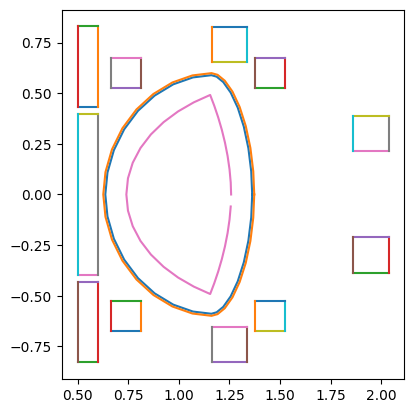

In [9]:
## Plot geometry
fig, ax = plt.subplots(1,1)
for region in gs_mesh.regions:
    region.plot_segments(fig,ax)
ax.set_aspect('equal','box')

kappa = 1.9
delta = -0.6
from create_isoflux import create_isoflux
r, z, zeff = boundaryShape(kapu = kappa, kapl = kappa, delu = delta, dell = delta, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1., zoffset = 0, upnull = True, lonull = True, npts = 8)
boundary = np.column_stack((r,z))
boundary = np.nan_to_num(boundary)
plt.plot(boundary[:,0], boundary[:,1])

In [10]:
mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
coil_dict = gs_mesh.get_coils()
cond_dict = gs_mesh.get_conductors()

mygs = TokaMaker()
mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
mygs.setup_regions(cond_dict=cond_dict)
mygs.setup(order = 2, F0 =1*3) ## F0 = R0 * B0

coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
targets = np.zeros(mygs.ncoils+1)
coil_weights = 0.5*np.ones(mygs.ncoils+1)

#Set target values for CS coils
coil_reg_mat[0,0] = 1
coil_reg_mat[1,1] = 1
coil_reg_mat[2,2] = 1
targets[0] = -3E6
targets[1] = -3E6
targets[2] = -3E6

#Enforce up/down symmetry in PF coils
coil_reg_mat[3,3] = 1
coil_reg_mat[3,7] = -1
coil_reg_mat[4,4] = 1
coil_reg_mat[4,8] = -1
coil_reg_mat[5,5] = 1
coil_reg_mat[5,9] = -1
coil_reg_mat[6,6] = 1
coil_reg_mat[6,10] = -1

mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

#Set upper bound on coil currents
coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11
mygs.set_coil_bounds(coil_bounds)


Assembling regions:
  # of unique points    = 574
  # of unique segments  = 50
Generating mesh:
  # of points  = 4175
  # of cells   = 8232
  # of regions = 14
#----------------------------------------------
OpenFUSIONToolkit Initialized
Development branch:   main
Revision id:          11ca7a7
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.870E+00
    # of points  =    4175
    # of edges   =   12406
    # of cells   =    8232
    # of boundary points =     

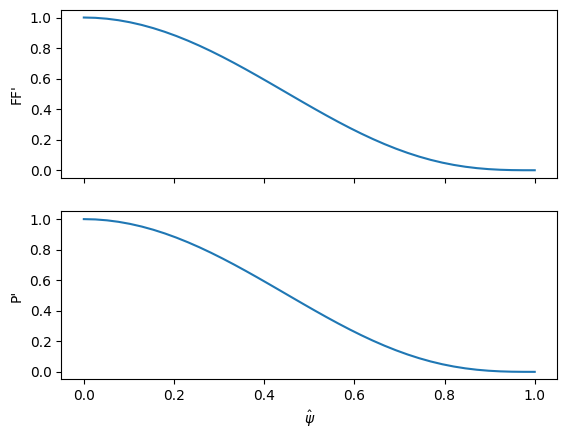

In [11]:
# Define shape of P' anf FF' profiles

n_sample = 40
psi_sample = np.linspace(0.0,1.0,n_sample)

# Set F*F' profile
alpha = 2
gamma = 3
ffp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)

# Set P' profile
alpha = 2
gamma = 3
pp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

fig, ax = plt.subplots(2,1,sharex=True)
# Plot F*F'
ax[0].plot(ffp_prof['x'],ffp_prof['y'])
ax[0].set_ylabel("FF'")
# Plot P'
ax[1].plot(pp_prof['x'],pp_prof['y'])
ax[1].set_ylabel("P'")
_ = ax[-1].set_xlabel(r"$\hat{\psi}$")

mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

In [12]:
#Define global quantities
Ip_target = 1E6
mygs.set_targets(Ip = Ip_target, Ip_ratio=1) #Can change poloidal beta by modifying Ip_ratio target

In [13]:
kappa = 1.7
delta = -0.5
#r, z, zeff = boundaryShape(kapu = kappa, kapl = kappa, delu = delta, dell = delta, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1.0, zoffset = 0, upnull = True, lonull = True, npts = 8)
#boundary = np.column_stack((r,z))

isoflux_weights = 10*np.ones(32)
mygs.set_isoflux(boundary, isoflux_weights)

#Set saddle targets
x_points = np.zeros((2,2))
x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]

x_weights = 5*np.ones(2)
mygs.set_saddles(x_points, x_weights)


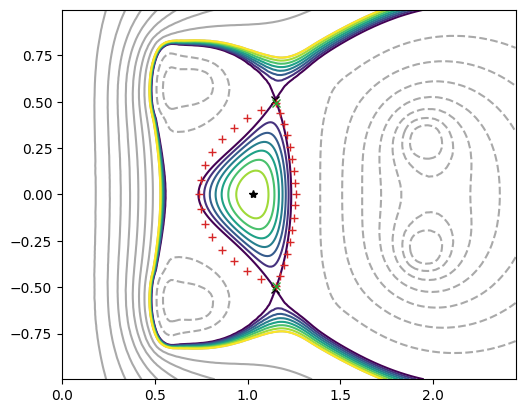

In [14]:
mygs.init_psi(1,0,0.22, kappa,delta) #Initial "guess"
fig, ax = plt.subplots()
mygs.plot_psi(fig, ax)
mygs.plot_constraints(fig,ax)

In [15]:

mygs.settings.maxits = 100
mygs.update_settings()
mygs.solve()

Starting non-linear GS solver
     1  1.0939E+01  5.1816E+00  3.6557E-02  1.0343E+00 -8.4287E-18 -0.0000E+00
     2  1.1692E+01  5.5661E+00  1.1509E-02  1.0350E+00 -8.8728E-18 -0.0000E+00
     3  1.2005E+01  5.7297E+00  3.5695E-03  1.0350E+00 -8.9751E-18 -0.0000E+00
     4  1.2178E+01  5.8204E+00  1.3278E-03  1.0349E+00 -9.0164E-18 -0.0000E+00
     5  1.2278E+01  5.8726E+00  5.9622E-04  1.0348E+00 -9.0364E-18 -0.0000E+00
     6  1.2335E+01  5.9027E+00  3.0419E-04  1.0346E+00 -9.0471E-18 -0.0000E+00
     7  1.2367E+01  5.9202E+00  1.6611E-04  1.0346E+00 -9.0530E-18 -0.0000E+00
     8  1.2386E+01  5.9303E+00  9.3750E-05  1.0345E+00 -9.0565E-18 -0.0000E+00
     9  1.2397E+01  5.9361E+00  5.3762E-05  1.0345E+00 -9.0585E-18 -0.0000E+00
    10  1.2403E+01  5.9395E+00  3.1085E-05  1.0345E+00 -9.0597E-18 -0.0000E+00
    11  1.2407E+01  5.9414E+00  1.8050E-05  1.0344E+00 -9.0604E-18 -0.0000E+00
    12  1.2409E+01  5.9425E+00  1.0505E-05  1.0344E+00 -9.0608E-18 -0.0000E+00
    13  1.2410E+01  5.

0

[ 1.15745859 -0.49091475]
[1.15715255 0.49170395]
bye
Equilibrium Statistics:
  Topology                =   Diverted
  Toroidal Current [A]    =    9.9999E+05
  Current Centroid [m]    =    1.025  0.000
  Magnetic Axis [m]       =    1.034 -0.000
  Elongation              =    1.845 (U:  1.924, L:  1.767)
  Triangularity           =   -0.523 (U: -0.615, L: -0.430)
  Plasma Volume [m^3]     =    2.226
  q_0, q_95               =    0.510  2.001
  Peak Pressure [Pa]      =    4.0077E+05
  Stored Energy [J]       =    2.2562E+05
  <Beta_pol> [%]          =   53.1757
  <Beta_tor> [%]          =    1.9842
  Diamagnetic flux [Wb]   =    9.7956E-03
  Toroidal flux [Wb]      =    1.0408E+00
  l_i                     =    1.2432


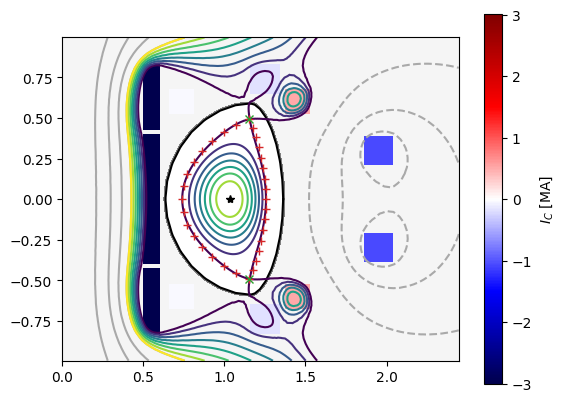

In [16]:
fig, ax = plt.subplots(1,1)
mygs.plot_machine(fig,ax, coil_colormap='seismic',coil_symmap=True,coil_scale=1.E-6,coil_clabel=r'$I_C$ [MA]')
mygs.plot_psi(fig,ax,xpoint_color=None,vacuum_nlevels=4)
mygs.plot_constraints(fig,ax)
mygs.print_info()

In [18]:
eig_wall, eigvec_wall = mygs.eig_wall()
print(1/eig_wall[1,0])

0.002101644122756776


In [17]:
currents, currentmap = mygs.get_coil_currents()
print(currents)

[-2993884.7663379  -3006113.59870795 -2993700.98258313   -32825.74364054
  -172174.72084448   510209.06804318 -1065817.54567219   -33298.65071593
  -173094.7253306    510936.57552093 -1065810.01976596]


#----------------------------------------------
OpenFUSIONToolkit Initialized
Development branch:   main
Revision id:          11ca7a7
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.870E+00
    # of points  =    4175
    # of edges   =   12406
    # of cells   =    8232
    # of boundary points =     116
    # of boundary edges  =     116
    # of boundary cells  =     116
  Resolution statistics:
    hmin =  1.000E-02
    hrms =  3.924E-02
    hmax =  1.119

 "none"
Flux surfaces from 600x600 gEQDSK
Levels based on psi ...
Grid diagonal resolution: 0.0025365011216131003 [m]
Cropping tables ...
Find magnetic axis ...
Find separatrix ...
Tracing flux surfaces ...
  > Took 0:00:01.821905
Find Br, Bz, F on flux surfaces ...
  > Took 0:00:01.054789
Flux surface averaging ...
  > Took 0:00:01.332838
Geometric quantities ...
  > Took 0:00:03.238412
[ 1.07706319 -0.38718392]
[1.0770799  0.38721931]
bye
#----------------------------------------------
OpenFUSIONToolkit Initialized
Development branch:   main
Revision id:          11ca7a7
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#

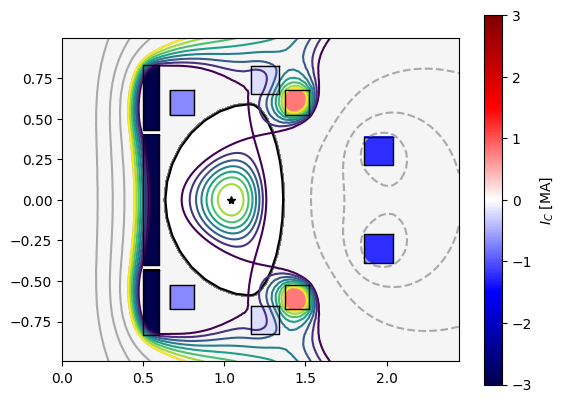

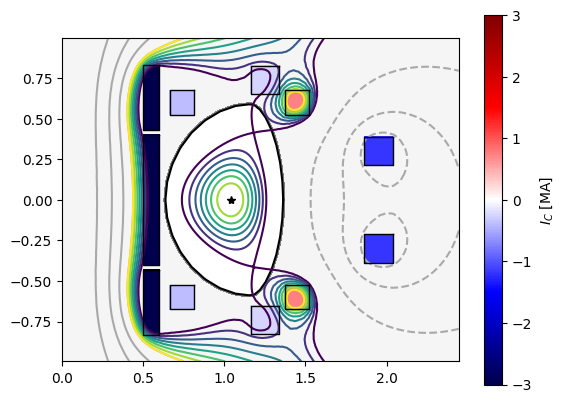

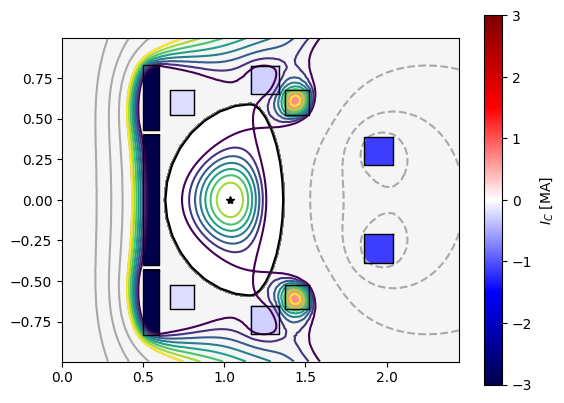

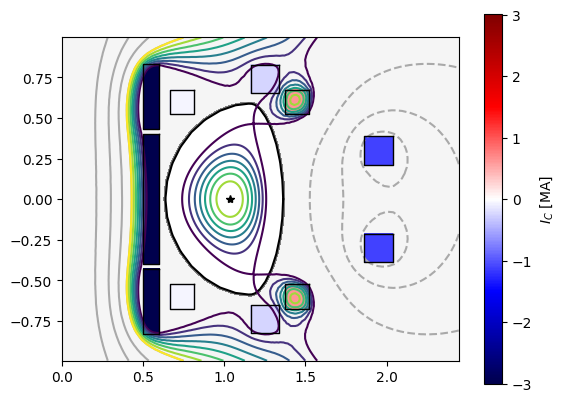

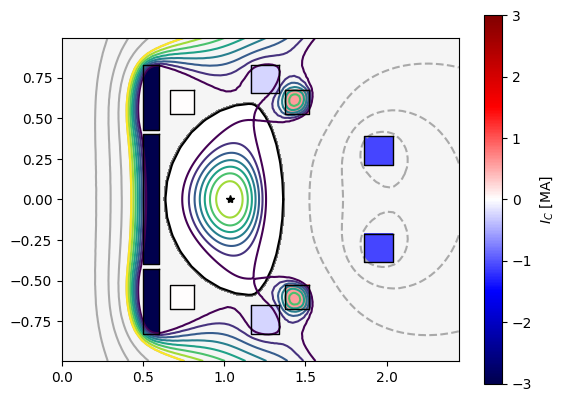

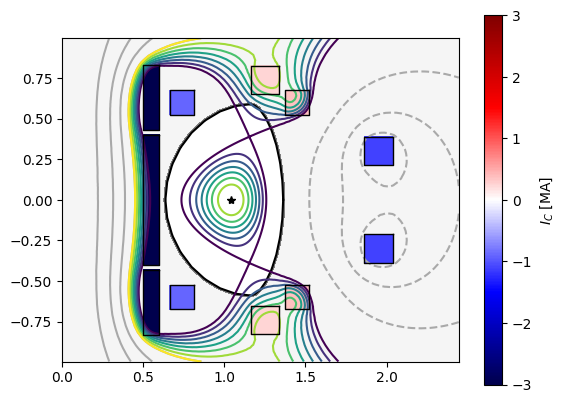

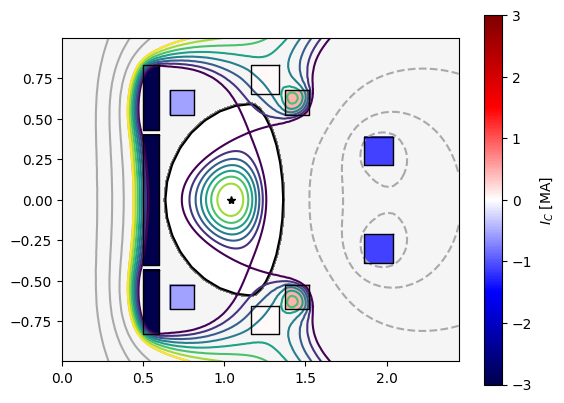

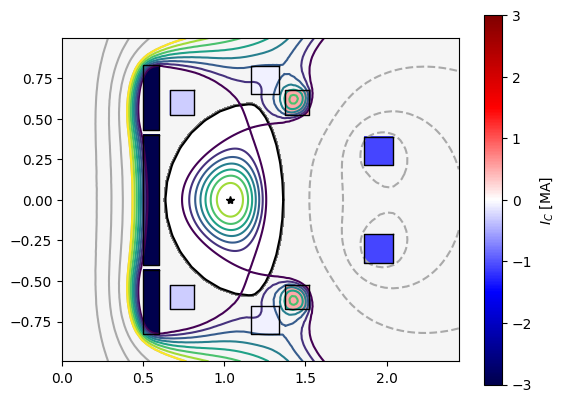

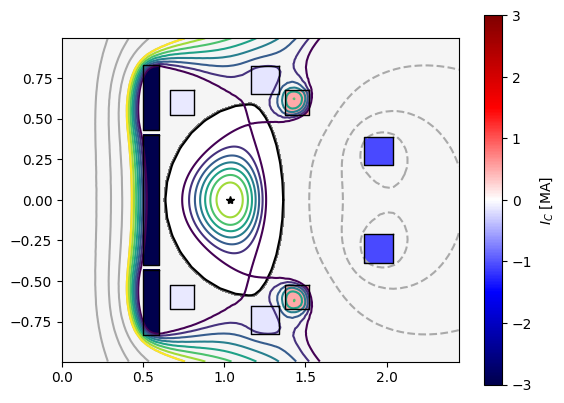

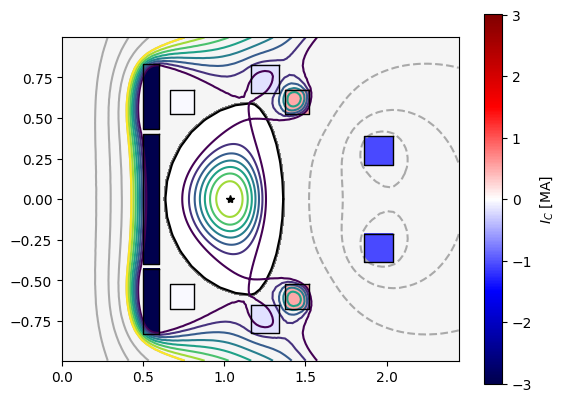

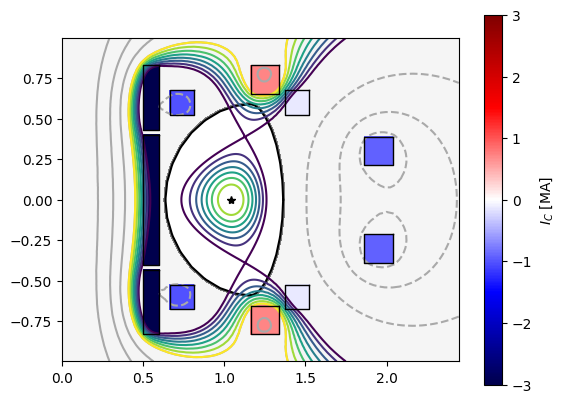

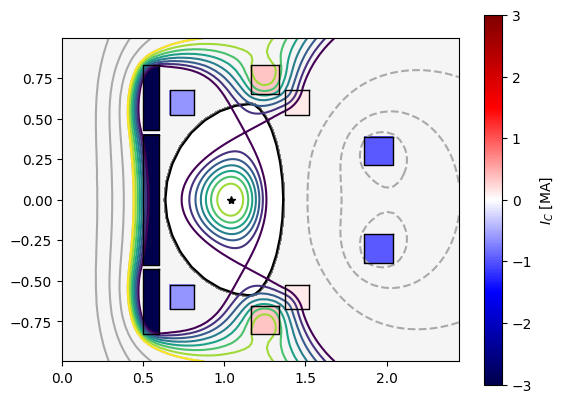

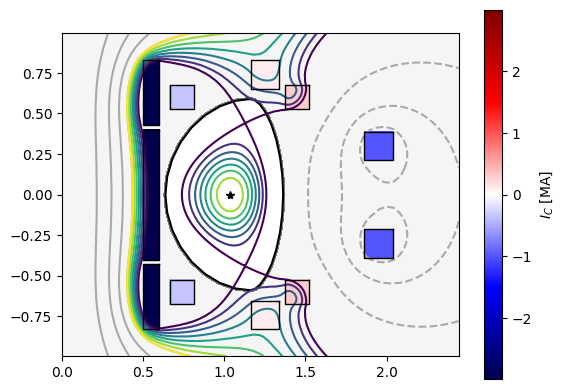

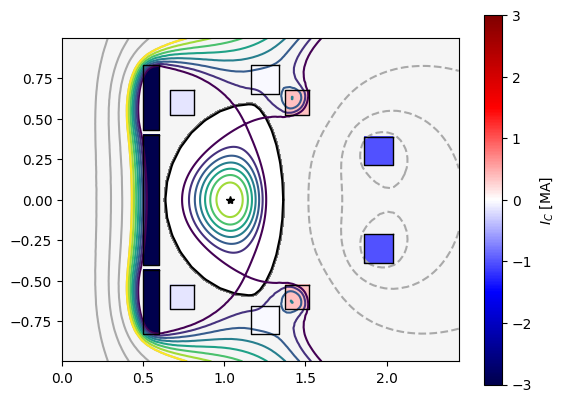

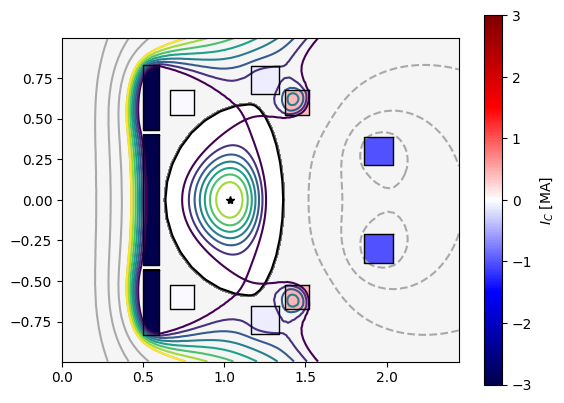

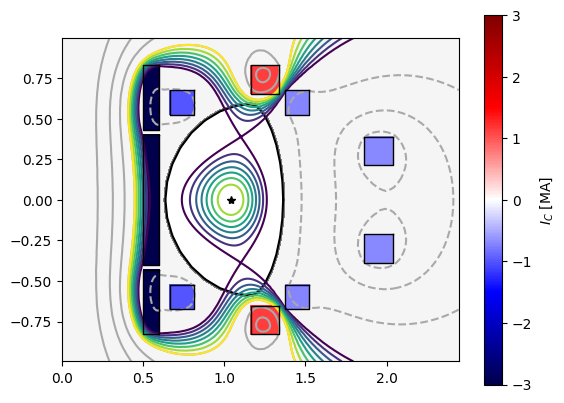

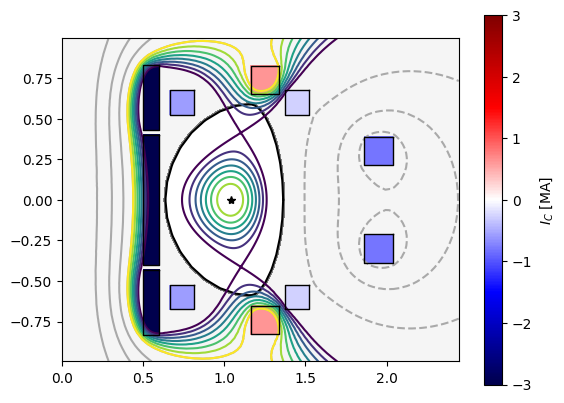

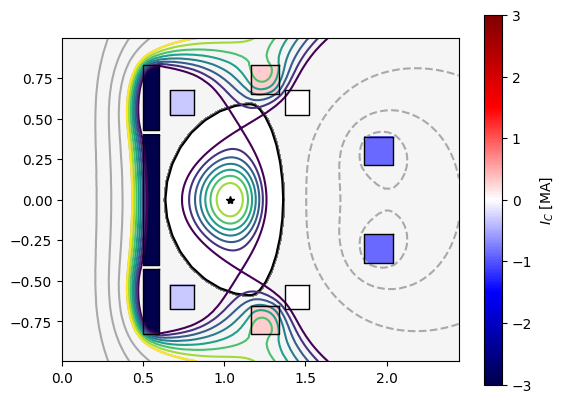

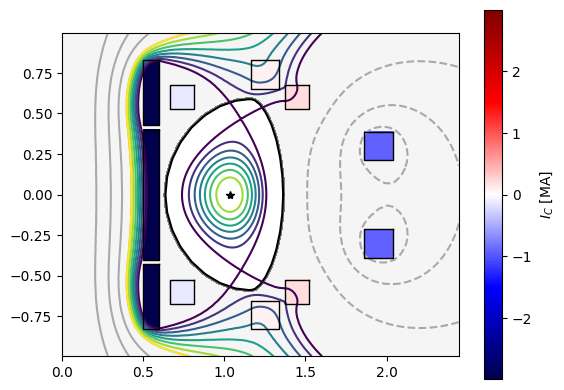

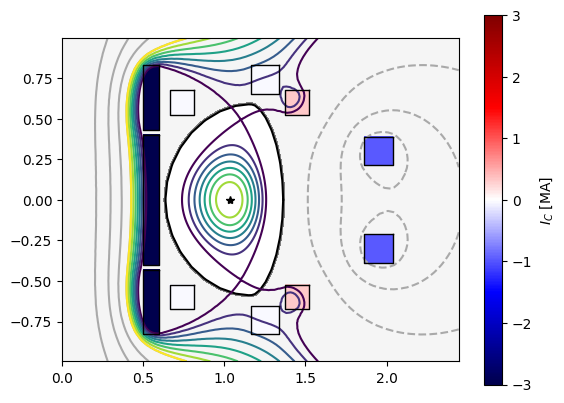

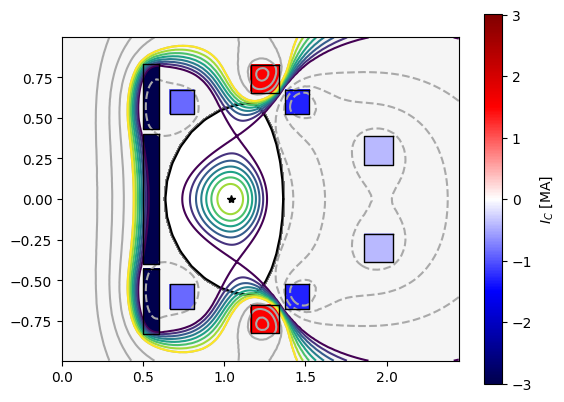

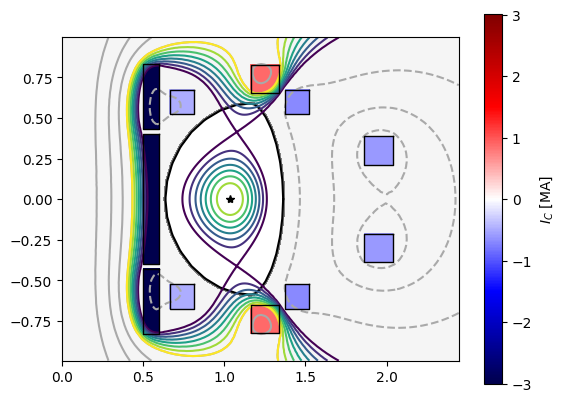

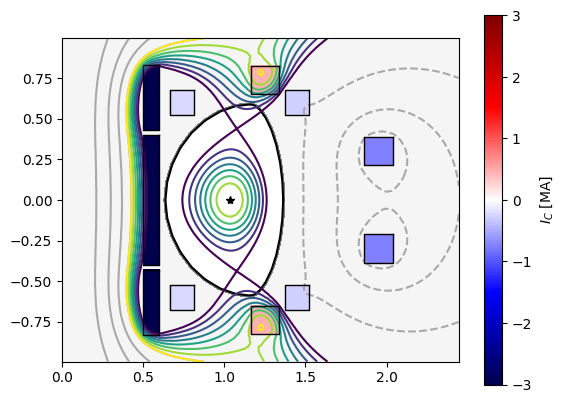

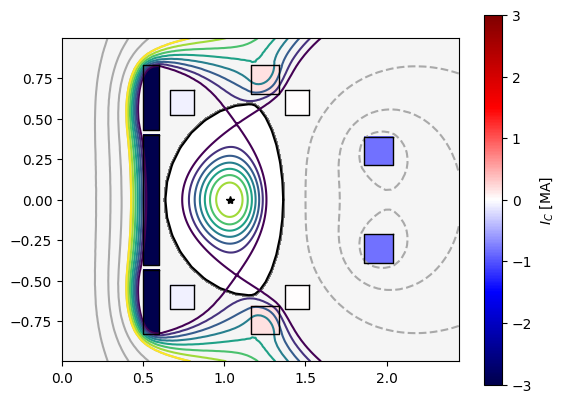

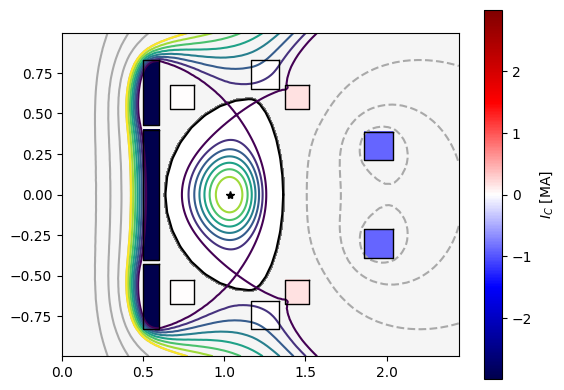

In [18]:
import copy
from omfit_classes.omfit_eqdsk import OMFITgeqdsk
d_omfit = []
e_omfit = []
d_tok = []
e_tok = []
q95 = []
betap = []
li = []
coil_currents = []
ds = np.linspace(-0.7, -.3, 5)
es = np.linspace(1.5, 1.9, 5)
dist = []
gammas = []
taus = []
eqdsks = []
lcfs = []

for d in ds: 
    for e in es:
        mygs.reset()
        mygs = TokaMaker()
        mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
        mygs.setup_regions(cond_dict=cond_dict)
        mygs.setup(order = 2, F0 =0.8*3) ## F0 = B0 * R0

        coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
        targets = np.zeros(mygs.ncoils+1)
        coil_weights = 0.5*np.ones(mygs.ncoils+1)

        #Set target values for CS coils
        coil_reg_mat[0,0] = 1
        coil_reg_mat[1,1] = 1
        coil_reg_mat[2,2] = 1
        targets[0] = -3E6
        targets[1] = -3E6
        targets[2] = -3E6

        #Enforce up/down symmetry in PF coils
        coil_reg_mat[3,3] = 1
        coil_reg_mat[3,7] = -1
        coil_reg_mat[4,4] = 1
        coil_reg_mat[4,8] = -1
        coil_reg_mat[5,5] = 1
        coil_reg_mat[5,9] = -1
        coil_reg_mat[6,6] = 1
        coil_reg_mat[6,10] = -1
        mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

        #Set upper bound on coil currents
        coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
        coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11
        mygs.set_coil_bounds(coil_bounds)

        # Define shape of P' anf FF' profiles
        n_sample = 40
        psi_sample = np.linspace(0.0,1.0,n_sample)
        # Set F*F' profile
        alpha = 2
        gamma = 3
        ffp_prof = {
            'type': 'linterp',
            'x': psi_sample,
            'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
        }
        ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
        # Set P' profile
        alpha = 2
        gamma = 3
        pp_prof = {
            'type': 'linterp',
            'x': psi_sample,
            'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
        }
        pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

        mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

        # set global targets
        Ip_target = 1E6
        mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)

        # set boundary/saddle point targets
        r, z, zeff = boundaryShape(kapu = e, kapl = e, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1, zoffset = 0, upnull = True, lonull = True, npts = 8)
        boundary = np.column_stack((r,z))
        boundary = np.nan_to_num(boundary)
        x_points = np.zeros((2,2))
        x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
        x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
        x_weights = 5*np.ones(2)
        mygs.set_saddles(x_points, x_weights)
        isoflux_weights = 10*np.ones(32)

      
        
        mygs.set_isoflux(boundary, isoflux_weights)

        #find equilibrium
        mygs.init_psi(0.68,0,0.2, 1.8,0.3)
        mygs.settings.maxits = 100
        mygs.update_settings()
        mygs.solve()

        #plot equilibrium
        fig, ax = plt.subplots(1,1)
        mygs.plot_machine(fig,ax,coil_colormap='seismic',coil_symmap=True,coil_scale=1.E-6,coil_clabel=r'$I_C$ [MA]')
        mygs.plot_psi(fig,ax,xpoint_color=None,vacuum_nlevels=4)
        
        for key, coil in coils.items():
            plt.plot(corners(coil['rc'],coil['zc'],coil['w'],coil['h'])[:,0],corners(coil['rc'],coil['zc'],coil['w'],coil['h'])[:,1], color = 'k', linewidth = 1)

        #save as eqdsk
        mygs.save_eqdsk('temp', lcfs_pad = .001, nr = 600, nz = 600)

        eqdsk = OMFITgeqdsk('temp')
        d_omfit.append(eqdsk['fluxSurfaces']['geo']['delta'][-1])    
        e_omfit.append(eqdsk['fluxSurfaces']['geo']['kap'][-1])
        
        

        lcfs.append(read_eqdsk('temp')['rzout'])
        stats = mygs.get_stats()
        q95.append(stats['q_95'])
        betap.append(stats['beta_pol'])
        li.append(stats['l_i'])
        d_tok.append(stats['delta'])
        e_tok.append(stats['kappa'])

        eig_vals, eig_vecs = mygs.eig_td(-1.E5,10, include_bounds = True)
        gammas.append(eig_vals[0,0])

        eig_wall, eigvec_wall = mygs.eig_wall()
        taus.append(1/eig_wall[1][0])

        #extract coil currents
        current,currentmap = mygs.get_coil_currents()
        coil_currents.append(current)
        

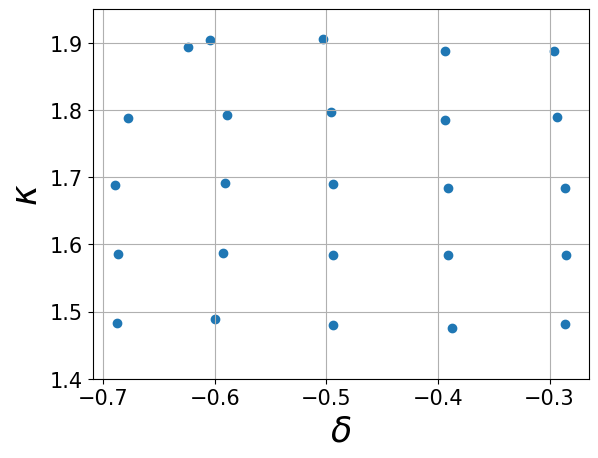

In [21]:
plt.scatter(d_omfit, e_omfit)
plt.xlabel(r'$\delta$', size = 25)
plt.ylabel(r'$\kappa$', size = 25)
#plt.xlim([-0.8, -0.2])
plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()

In [28]:
print(e_omfit)

[1.4832160677740247, 1.5851700461326663, 1.6882490289407905, 1.7879967255452527, 1.8938784566972973, 1.488931067716673, 1.5869556364723574, 1.690533426740567, 1.792327414843163, 1.9035232616299889, 1.4796503495503972, 1.583793738041465, 1.6890441018212825, 1.7962524919216993, 1.9052896106703554, 1.4755162450763852, 1.5836906054444808, 1.6844913674270496, 1.7852839455472138, 1.8872015837565328, 1.4812496399624608, 1.5844826365078566, 1.6838847028368193, 1.7900033196782177, 1.887514852964647]


In [22]:
gamma = np.array(gammas)
tau = np.array(taus)

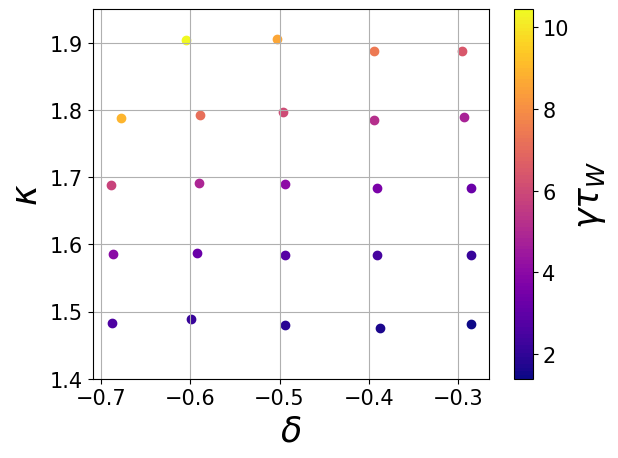

In [26]:
gt = np.array(gamma*tau*-1)
norm = plt.Normalize(np.min(gt), 10.4457549)
cmap = mpl.cm.plasma(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])
c = cmap(norm(gt))

for i in range(25):
    if i is not 4:
        plt.scatter(d_omfit[i], e_omfit[i], color = c[i])
plt.xlabel(r'$\delta$', size = 25)
plt.ylabel(r'$\kappa$', size = 25)
#plt.xlim([-0.7, -0.2])
plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$\gamma \tau_{W}$', size = 25)
cb.ax.tick_params(labelsize=15)

(array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

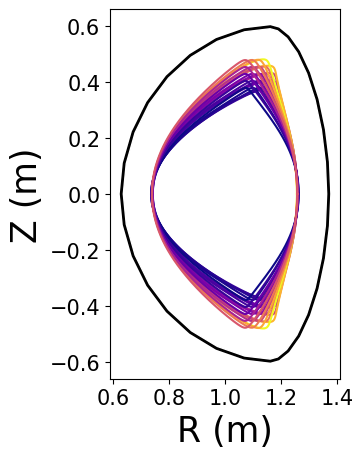

In [36]:
fig, ax = plt.subplots()
plt.fill(vv2[:,0], vv2[:,1], color = 'k')
plt.fill(lim2[:,0], lim2[:,1], color = 'w')
for i in range(25):
    if i is not 4:
        plt.plot(lcfs[i][:,0], lcfs[i][:,1], color = c[i])

plt.gca().set_aspect(aspect = 1)

plt.xlabel(r'R (m)', size = 25)
plt.ylabel(r'Z (m)', size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)


Assembling regions:
  # of unique points    = 512
  # of unique segments  = 50
Generating mesh:
  # of points  = 4262
  # of cells   = 8406
  # of regions = 14
#----------------------------------------------
OpenFUSIONToolkit Initialized
Development branch:   main
Revision id:          11ca7a7
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.870E+00
    # of points  =    4262
    # of edges   =   12667
    # of cells   =    8406
    # of boundary points =     

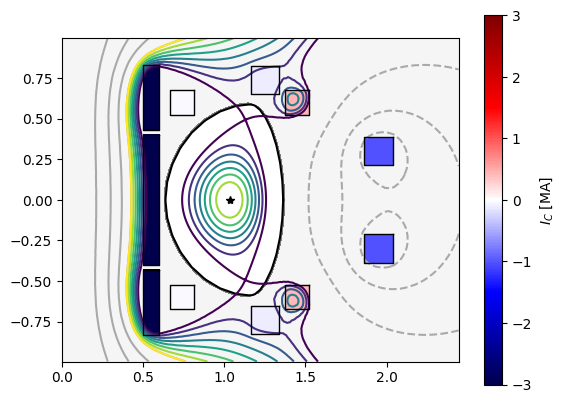

In [42]:
d = -0.5
e = 1.9

gs_mesh = gs_Domain()
# Define region information for mesh
gs_mesh.define_region('air',vac_resolution,'boundary')
gs_mesh.define_region('plasma',plasma_resolution,'plasma')
gs_mesh.define_region('vv',vv_resolution,'conductor',eta=1.33e-6)
#gs_mesh.define_region('plate_upper',vv_resolution,'conductor',eta=3.8E-8)
#gs_mesh.define_region('plate_lower',vv_resolution,'conductor',eta=3.8E-8)
# Define each of the coils
for key, coil in coils.items():
    gs_mesh.define_region(key,coil_resolution,'coil')

# Define vaccum vessel geometry
gs_mesh.add_annulus(lim2,'plasma',vv2,'vv',parent_name='air')
# Define the shape of the coils
for key, coil in coils.items():
    gs_mesh.add_rectangle(coil['rc'],coil['zc'],coil['w'],coil['h'],key,parent_name='air')

#gs_mesh.add_polygon(ps_points[i,:,:], 'plate_upper')
#gs_mesh.add_polygon(ps_points[25-i,:,:], 'plate_lower')

    #Create mesh
mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
coil_dict = gs_mesh.get_coils()
cond_dict = gs_mesh.get_conductors()

mygs.reset()
mygs = TokaMaker()
mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
mygs.setup_regions(cond_dict=cond_dict)
mygs.setup(order = 2, F0 =1*3) ## F0 = B0 * R0

coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
targets = np.zeros(mygs.ncoils+1)
coil_weights = 0.5*np.ones(mygs.ncoils+1)

#Set target values for CS coils
coil_reg_mat[0,0] = 1
coil_reg_mat[1,1] = 1
coil_reg_mat[2,2] = 1
targets[0] = -3E6
targets[1] = -3E6
targets[2] = -3E6

#Enforce up/down symmetry in PF coils
coil_reg_mat[3,3] = 1
coil_reg_mat[3,7] = -1
coil_reg_mat[4,4] = 1
coil_reg_mat[4,8] = -1
coil_reg_mat[5,5] = 1
coil_reg_mat[5,9] = -1
coil_reg_mat[6,6] = 1
coil_reg_mat[6,10] = -1
mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

#Set upper bound on coil currents
coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11
mygs.set_coil_bounds(coil_bounds)

# Define shape of P' anf FF' profiles
n_sample = 40
psi_sample = np.linspace(0.0,1.0,n_sample)
# Set F*F' profile
alpha = 2
gamma = 3
ffp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
# Set P' profile
alpha = 2
gamma = 3
pp_prof = {
        'type': 'linterp',
        'x': psi_sample,
        'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

# set global targets
Ip_target = 1E6
mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)

# set boundary/saddle point targets
r, z, zeff = boundaryShape(kapu = e, kapl = e, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1, zoffset = 0, upnull = True, lonull = True, npts = 8)
boundary = np.column_stack((r,z))
x_points = np.zeros((2,2))
x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
x_weights = 5*np.ones(2)
mygs.set_saddles(x_points, x_weights)
isoflux_weights = 10*np.ones(32)
        
mygs.set_isoflux(boundary, isoflux_weights)

#find equilibrium
mygs.init_psi(0.68,0,0.2, 1.8,0.3)
mygs.settings.maxits = 100
mygs.update_settings()
mygs.solve()

#plot equilibrium
fig, ax = plt.subplots(1,1)
mygs.plot_machine(fig,ax,coil_colormap='seismic',coil_symmap=True,coil_scale=1.E-6,coil_clabel=r'$I_C$ [MA]')
mygs.plot_psi(fig,ax,xpoint_color=None,vacuum_nlevels=4)
        
for key, coil in coils.items():
    plt.plot(corners(coil['rc'],coil['zc'],coil['w'],coil['h'])[:,0],corners(coil['rc'],coil['zc'],coil['w'],coil['h'])[:,1], color = 'k', linewidth = 1)

#save as eqdsk
eig_vals, eig_vecs = mygs.eig_td(-1.E5,10, include_bounds = True)
print(eig_vals[0,0])



Saving EQDSK file
 "none"


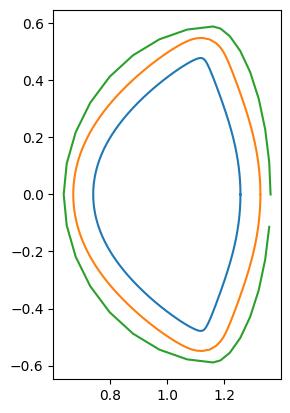

In [14]:
mygs.save_eqdsk('temp', lcfs_pad = .001, nr = 600, nz = 600)
boundary = read_eqdsk('temp')['rzout']
plt.plot(boundary[:,0], boundary[:,1])
plt.gca().set_aspect(aspect =1 )

boundary = resize_polygon(boundary, 0.07)
plt.plot(boundary[:,0], boundary[:,1])
plt.plot(lim2[:,0], lim2[:,1])

In [15]:
def place_points(npoints, arc):
    arclength = np.zeros(np.size(arc[:,0]))
    for i,point in enumerate(arc):
        if i==0:
            arclength[i] = 0
        else:

            arclength[i] = arclength[i-1] + ((arc[i,0]-arc[i-1,0])**2+(arc[i,1]-arc[i-1,1])**2)**0.5

    spacing = arclength[-1]/npoints
    curr = 1
    inds = [0]
    locs = [arc[0,:]]
    for i, point in enumerate(arc):
        if(arclength[i]>curr*spacing and curr<npoints):
            inds.append(i)
            locs.append(arc[i])
            curr+=1
    return np.array(inds), np.array(locs)

[[ 1.0486602   0.52696641]
 [ 0.95621251  0.46556899]
 [ 0.8765306   0.39848463]
 [ 0.80355703  0.32262557]
 [ 0.74071103  0.2364127 ]
 [ 0.69594997  0.14320384]
 [ 0.67262185  0.03885334]
 [ 0.67645994 -0.06823376]
 [ 0.70532008 -0.16729416]
 [ 0.75691665 -0.26152489]
 [ 0.82219772 -0.34365497]
 [ 0.90082208 -0.42023355]
 [ 0.98359998 -0.48555276]
 [ 1.07866446 -0.54079943]]


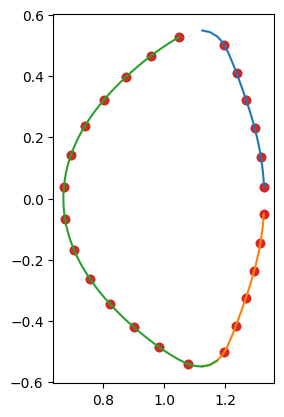

In [33]:

plt.gca().set_aspect(aspect = 1)
ps_ur = boundary[15:134,:]
ps_lr = np.flip(boundary[466:580,:],0)
ps_l = boundary[140:469,:]
inds_ur, locs_ur = place_points(6,ps_ur)
inds_lr, locs_lr = place_points(6,ps_lr)
inds_l, locs_l = place_points(14, ps_l)

plt.plot(ps_ur[:,0], ps_ur[:,1])
plt.plot(ps_lr[:,0], ps_lr[:,1])
plt.plot(ps_l[:,0], ps_l[:,1])


print(locs_l)

plt.scatter(locs_ur[:,0], locs_ur[:,1])
plt.scatter(locs_lr[:,0], locs_lr[:,1])
plt.scatter(locs_l[:,0], locs_l[:,1])

inds = np.concatenate((inds_ur + 15, inds_l+140, np.flip(579-inds_lr,0)))
#locs = np.concatenate((locs_ur,locs_l, locs_lr))

plt.scatter(boundary[inds,0], boundary[inds,1])
#print(ps_path[inds,:])
#print(inds)

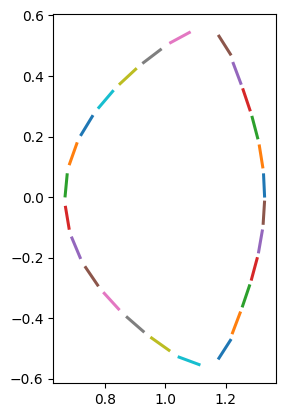

In [34]:
derivs = []
for i, point in enumerate(boundary):
    if i==0:
        last = boundary[-1,:]
        next = boundary[i+1,:]
    elif i == np.size(boundary[:,0])-1:
        last = boundary[i-1,:]
        next = boundary[0,:]
    else: 
        next = boundary[i+1,:]
        last = boundary[i-1,:]
    
    derivs.append((next-last)/np.linalg.norm(next-last))

derivs = np.array(derivs)
orth = np.transpose([derivs[:,1], -derivs[:,0]])
length = .08
width = .01
ps_points = []
for i in inds:
    center = boundary[i,:]
    p1 = center + length/2*derivs[i,:] + width/2*orth[i,:]
    p2 = center + length/2*derivs[i,:] - width/2*orth[i,:]
    p3 = center - length/2*derivs[i,:] - width/2*orth[i,:]
    p4 = center - length/2*derivs[i,:] + width/2*orth[i,:]

    ps_points.append([p1, p2, p3, p4])

ps_points = np.array(ps_points)
for i in range(26):
    plt.fill(ps_points[i,:,0], ps_points[i,:,1])

plt.gca().set_aspect(aspect = 1)

In [35]:
print(repr(ps_points))

array([[[ 1.32953704e+00,  7.86899116e-02],
        [ 1.31954773e+00,  7.82276122e-02],
        [ 1.32324613e+00, -1.68685377e-03],
        [ 1.33323544e+00, -1.22455442e-03]],

       [[ 1.31504916e+00,  1.74648729e-01],
        [ 1.30517485e+00,  1.73068200e-01],
        [ 1.31781908e+00,  9.40737484e-02],
        [ 1.32769339e+00,  9.56542773e-02]],

       [[ 1.29079290e+00,  2.69590010e-01],
        [ 1.28112179e+00,  2.67046462e-01],
        [ 1.30147017e+00,  1.89677584e-01],
        [ 1.31114128e+00,  1.92221131e-01]],

       [[ 1.26033044e+00,  3.60915914e-01],
        [ 1.25085307e+00,  3.57725411e-01],
        [ 1.27637708e+00,  2.81906387e-01],
        [ 1.28585446e+00,  2.85096889e-01]],

       [[ 1.22767148e+00,  4.47966414e-01],
        [ 1.21831324e+00,  4.44441746e-01],
        [ 1.24651058e+00,  3.69575799e-01],
        [ 1.25586882e+00,  3.73100466e-01]],

       [[ 1.17915095e+00,  5.38432042e-01],
        [ 1.17070378e+00,  5.33079905e-01],
        [ 1.21352088e+

In [37]:
plates = np.array([[[ 1.32953704e+00,  7.86899116e-02],
        [ 1.31954773e+00,  7.82276122e-02],
        [ 1.32324613e+00, -1.68685377e-03],
        [ 1.33323544e+00, -1.22455442e-03]],

       [[ 1.31504916e+00,  1.74648729e-01],
        [ 1.30517485e+00,  1.73068200e-01],
        [ 1.31781908e+00,  9.40737484e-02],
        [ 1.32769339e+00,  9.56542773e-02]],

       [[ 1.29079290e+00,  2.69590010e-01],
        [ 1.28112179e+00,  2.67046462e-01],
        [ 1.30147017e+00,  1.89677584e-01],
        [ 1.31114128e+00,  1.92221131e-01]],

       [[ 1.26033044e+00,  3.60915914e-01],
        [ 1.25085307e+00,  3.57725411e-01],
        [ 1.27637708e+00,  2.81906387e-01],
        [ 1.28585446e+00,  2.85096889e-01]],

       [[ 1.22767148e+00,  4.47966414e-01],
        [ 1.21831324e+00,  4.44441746e-01],
        [ 1.24651058e+00,  3.69575799e-01],
        [ 1.25586882e+00,  3.73100466e-01]],

       [[ 1.17915095e+00,  5.38432042e-01],
        [ 1.17070378e+00,  5.33079905e-01],
        [ 1.21352088e+00,  4.65502569e-01],
        [ 1.22196804e+00,  4.70854706e-01]],

       [[ 1.01109083e+00,  5.12353312e-01],
        [ 1.01584388e+00,  5.03555102e-01],
        [ 1.08622956e+00,  5.41579513e-01],
        [ 1.08147651e+00,  5.50377723e-01]],

       [[ 9.21361319e-01,  4.45310793e-01],
        [ 9.27420297e-01,  4.37355369e-01],
        [ 9.91063695e-01,  4.85827194e-01],
        [ 9.85004717e-01,  4.93782618e-01]],

       [[ 8.43825899e-01,  3.74917645e-01],
        [ 8.50633302e-01,  3.67592396e-01],
        [ 9.09235293e-01,  4.22051616e-01],
        [ 9.02427890e-01,  4.29376865e-01]],

       [[ 7.73816631e-01,  2.95413276e-01],
        [ 7.81430131e-01,  2.88929865e-01],
        [ 8.33297421e-01,  3.49837863e-01],
        [ 8.25683922e-01,  3.56321274e-01]],

       [[ 7.15657481e-01,  2.04832330e-01],
        [ 7.24201989e-01,  1.99637006e-01],
        [ 7.65764580e-01,  2.67993067e-01],
        [ 7.57220072e-01,  2.73188391e-01]],

       [[ 6.77835628e-01,  1.07191751e-01],
        [ 6.87257507e-01,  1.03840900e-01],
        [ 7.14064312e-01,  1.79215931e-01],
        [ 7.04642433e-01,  1.82566781e-01]],

       [[ 6.63886628e-01, -5.00132025e-04],
        [ 6.73842413e-01, -1.43946558e-03],
        [ 6.81357081e-01,  7.82068134e-02],
        [ 6.71401296e-01,  7.91461470e-02]],

       [[ 6.78099739e-01, -1.08511686e-01],
        [ 6.87963849e-01, -1.06868723e-01],
        [ 6.74820140e-01, -2.79558410e-02],
        [ 6.64956030e-01, -2.95988047e-02]],

       [[ 7.16179237e-01, -2.06115272e-01],
        [ 7.25401075e-01, -2.02247752e-01],
        [ 6.94460921e-01, -1.28473049e-01],
        [ 6.85239083e-01, -1.32340568e-01]],

       [[ 7.75231993e-01, -2.97435174e-01],
        [ 7.83507897e-01, -2.91821849e-01],
        [ 7.38601303e-01, -2.25614616e-01],
        [ 7.30325399e-01, -2.31227940e-01]],

       [[ 8.45468299e-01, -3.76571236e-01],
        [ 8.52854746e-01, -3.69830287e-01],
        [ 7.98927151e-01, -3.10738709e-01],
        [ 7.91540704e-01, -3.17479658e-01]],

       [[ 9.27683559e-01, -4.50291177e-01],
        [ 9.34255852e-01, -4.42754270e-01],
        [ 8.73960594e-01, -3.90175929e-01],
        [ 8.67388302e-01, -3.97712836e-01]],

       [[ 1.01334677e+00, -5.12758056e-01],
        [ 1.01912818e+00, -5.04598682e-01],
        [ 9.53853188e-01, -4.58347457e-01],
        [ 9.48071785e-01, -4.66506830e-01]],

       [[ 1.11443314e+00, -5.59389793e-01],
        [ 1.11790865e+00, -5.50013184e-01],
        [ 1.04289578e+00, -5.22209066e-01],
        [ 1.03942027e+00, -5.31585676e-01]],

       [[ 1.22202919e+00, -4.71548702e-01],
        [ 1.21361600e+00, -4.66143316e-01],
        [ 1.17037291e+00, -5.33448854e-01],
        [ 1.17878610e+00, -5.38854240e-01]],

       [[ 1.25359258e+00, -3.79742636e-01],
        [ 1.24424321e+00, -3.76194512e-01],
        [ 1.21585822e+00, -4.50989513e-01],
        [ 1.22520759e+00, -4.54537637e-01]],

       [[ 1.28436650e+00, -2.89983351e-01],
        [ 1.27489536e+00, -2.86774380e-01],
        [ 1.24922359e+00, -3.62543506e-01],
        [ 1.25869473e+00, -3.65752477e-01]],

       [[ 1.30943377e+00, -1.99807219e-01],
        [ 1.29977947e+00, -1.97200620e-01],
        [ 1.27892668e+00, -2.74435076e-01],
        [ 1.28858098e+00, -2.77041675e-01]],

       [[ 1.32622439e+00, -1.07794392e-01],
        [ 1.31637179e+00, -1.06083787e-01],
        [ 1.30268695e+00, -1.84904630e-01],
        [ 1.31253956e+00, -1.86615235e-01]],

       [[ 1.33315931e+00, -1.19202827e-02],
        [ 1.32317857e+00, -1.13000175e-02],
        [ 1.31821644e+00, -9.11459777e-02],
        [ 1.32819719e+00, -9.17662429e-02]]])

Assembling regions:
  # of unique points    = 520
  # of unique segments  = 58
Generating mesh:
  # of points  = 4260
  # of cells   = 8402
  # of regions = 16
#----------------------------------------------
OpenFUSIONToolkit Initialized
Development branch:   main
Revision id:          11ca7a7
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.870E+00
    # of points  =    4260
    # of edges   =   12661
    # of cells   =    8402
    # of boundary points =     

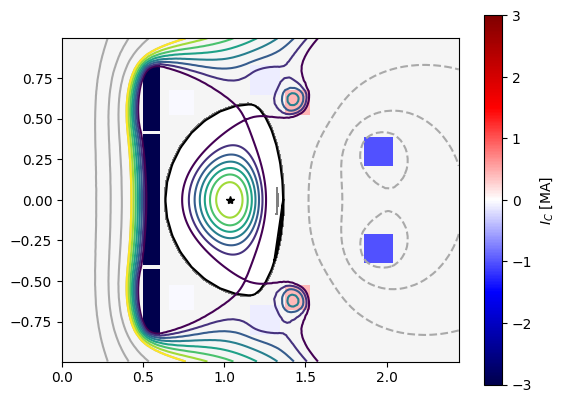

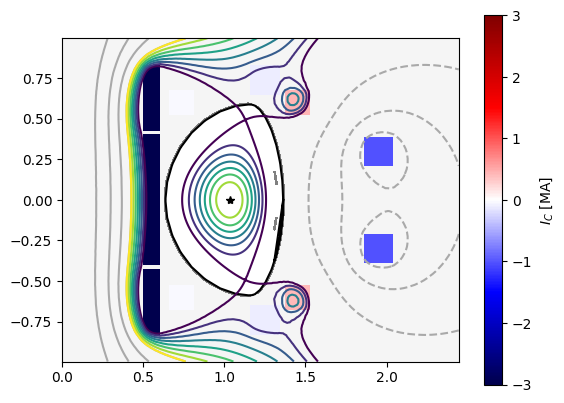

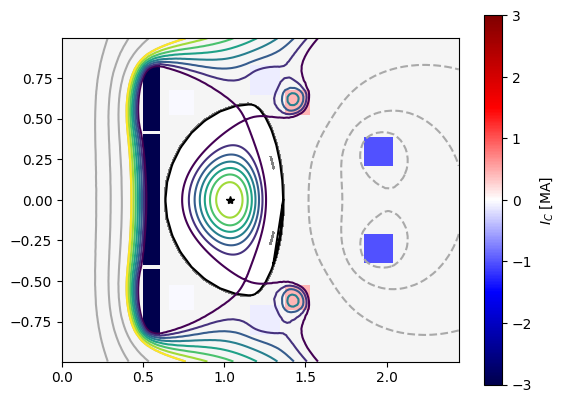

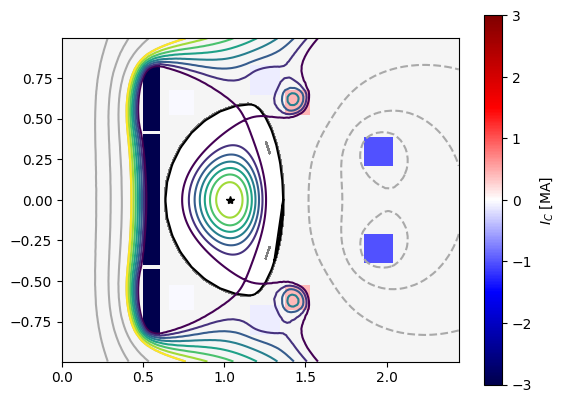

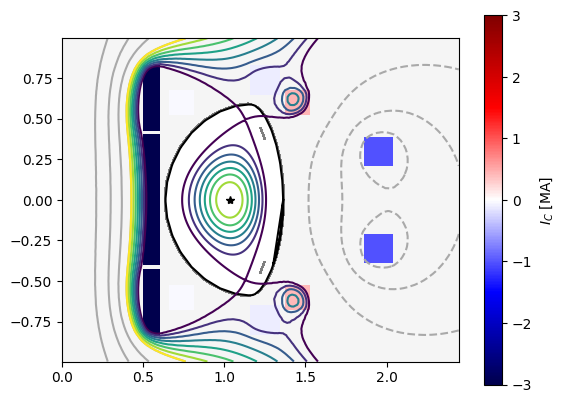

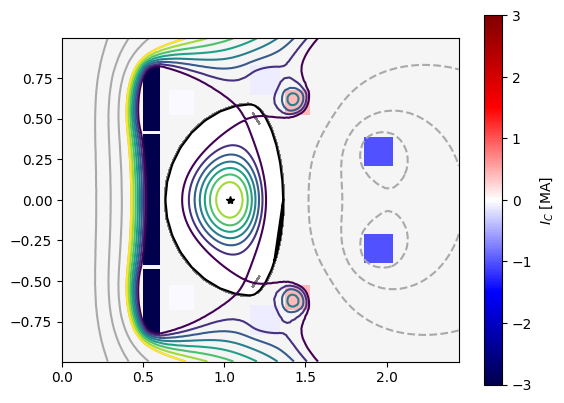

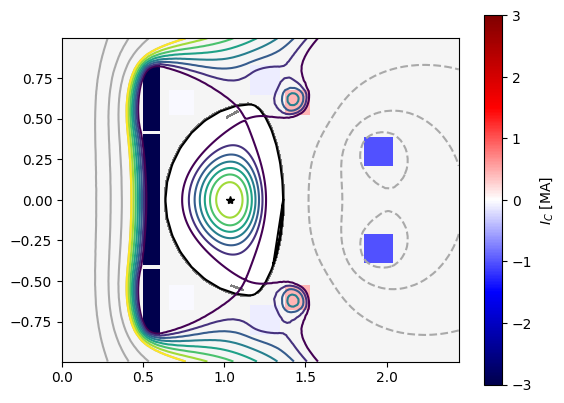

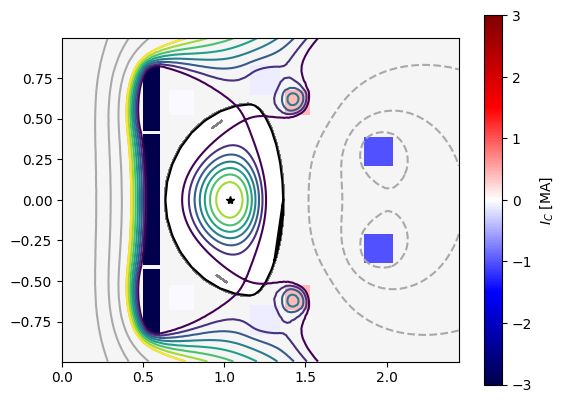

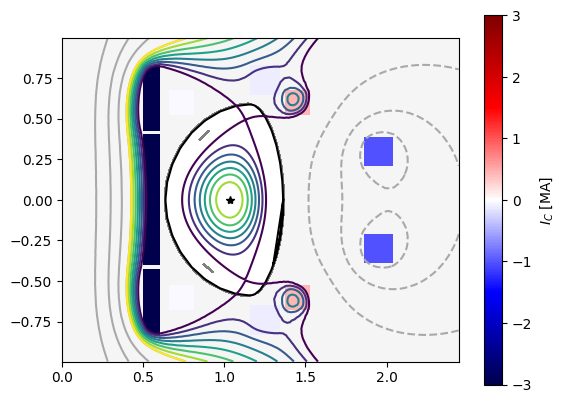

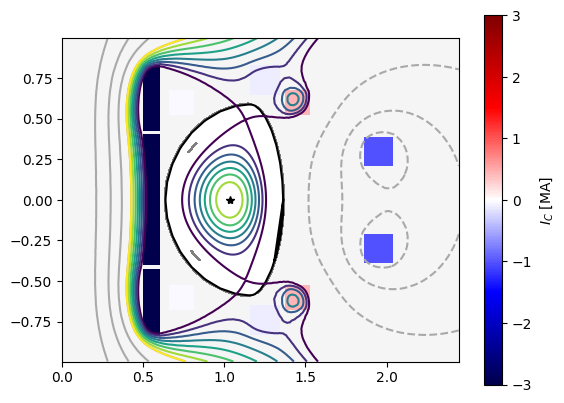

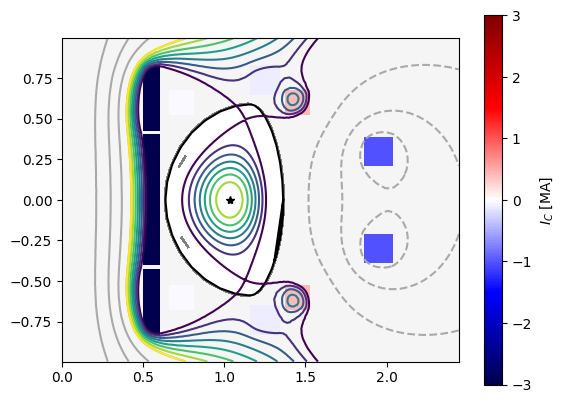

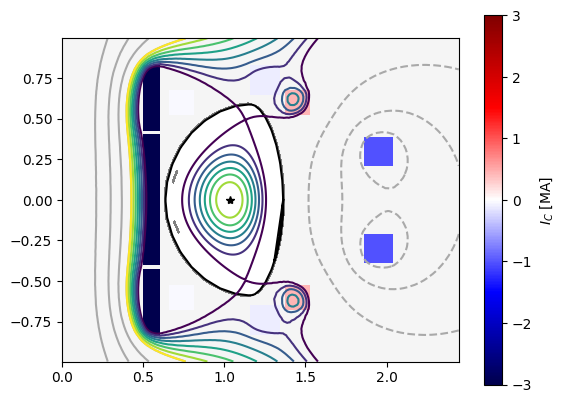

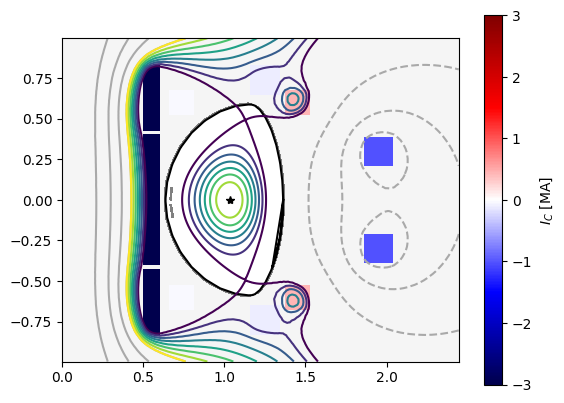

In [49]:
plasma_resolution = 0.02
coil_resolution = 0.04
vv_resolution = 0.075
vac_resolution = 0.075

gammas = []

e = 1.9
d = -0.5

for i in range(13):

    # Create a G-S domain
    gs_mesh = gs_Domain()
    # Define region information for mesh
    gs_mesh.define_region('air',vac_resolution,'boundary')
    gs_mesh.define_region('plasma',plasma_resolution,'plasma')
    gs_mesh.define_region('vv',vv_resolution,'conductor',eta=1.33e-6)
    gs_mesh.define_region('plate_upper',vv_resolution,'conductor',eta=3.8E-8)
    gs_mesh.define_region('plate_lower',vv_resolution,'conductor',eta=3.8E-8)
    # Define each of the coils
    for key, coil in coils.items():
        gs_mesh.define_region(key,coil_resolution,'coil')

    # Define vaccum vessel geometry
    gs_mesh.add_annulus(lim2,'plasma',vv2,'vv',parent_name='air')
    # Define the shape of the coils
    for key, coil in coils.items():
        gs_mesh.add_rectangle(coil['rc'],coil['zc'],coil['w'],coil['h'],key,parent_name='air')

    gs_mesh.add_polygon(plates[i,:,:], 'plate_upper')
    gs_mesh.add_polygon(plates[25-i,:,:], 'plate_lower')

    #Create mesh
    mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
    coil_dict = gs_mesh.get_coils()
    cond_dict = gs_mesh.get_conductors()

    mygs.reset()
    mygs = TokaMaker()
    mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
    mygs.setup_regions(cond_dict=cond_dict)
    mygs.setup(order = 2, F0 =1*3) ## F0 = B0 * R0

    coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
    targets = np.zeros(mygs.ncoils+1)
    coil_weights = 0.5*np.ones(mygs.ncoils+1)

    #Set target values for CS coils
    coil_reg_mat[0,0] = 1
    coil_reg_mat[1,1] = 1
    coil_reg_mat[2,2] = 1
    targets[0] = -3E6
    targets[1] = -3E6
    targets[2] = -3E6

    #Enforce up/down symmetry in PF coils
    coil_reg_mat[3,3] = 1
    coil_reg_mat[3,7] = -1
    coil_reg_mat[4,4] = 1
    coil_reg_mat[4,8] = -1
    coil_reg_mat[5,5] = 1
    coil_reg_mat[5,9] = -1
    coil_reg_mat[6,6] = 1
    coil_reg_mat[6,10] = -1
    mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

    #Set upper bound on coil currents
    coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
    coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11
    mygs.set_coil_bounds(coil_bounds)

    # Define shape of P' anf FF' profiles
    n_sample = 40
    psi_sample = np.linspace(0.0,1.0,n_sample)
    # Set F*F' profile
    alpha = 2
    gamma = 3
    ffp_prof = {
        'type': 'linterp',
        'x': psi_sample,
        'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
    }
    ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
    # Set P' profile
    alpha = 2
    gamma = 3
    pp_prof = {
        'type': 'linterp',
        'x': psi_sample,
        'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
    }
    pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

    mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

    # set global targets
    Ip_target = 1E6
    mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)

    # set boundary/saddle point targets
    r, z, zeff = boundaryShape(kapu = e, kapl = e, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1, zoffset = 0, upnull = True, lonull = True, npts = 8)
    boundary = np.column_stack((r,z))
    x_points = np.zeros((2,2))
    x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
    x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
    x_weights = 5*np.ones(2)
    mygs.set_saddles(x_points, x_weights)
    isoflux_weights = 10*np.ones(32)
        
    mygs.set_isoflux(boundary, isoflux_weights)

    #find equilibrium
    mygs.init_psi(0.68,0,0.2, 1.8,0.3)
    mygs.settings.maxits = 100
    mygs.update_settings()
    mygs.solve()

    #plot equilibrium
    fig, ax = plt.subplots(1,1)
    mygs.plot_machine(fig,ax,coil_colormap='seismic',coil_symmap=True,coil_scale=1.E-6,coil_clabel=r'$I_C$ [MA]')
    mygs.plot_psi(fig,ax,xpoint_color=None,vacuum_nlevels=4)
        
    
    #save as eqdsk
    eig_vals, eig_vecs = mygs.eig_td(-1.E5,10, include_bounds = True)
    gammas.append(eig_vals[0,0])




In [50]:
print(-np.array(gammas)/4374.86737195676)

[0.82431701 0.52198278 0.31359782 0.29873422 0.43043314 0.69876396
 0.65964734 0.40262823 0.30688646 0.31310497 0.50436147 0.72325987
 0.92800226]


NameError: name 'gammas' is not defined

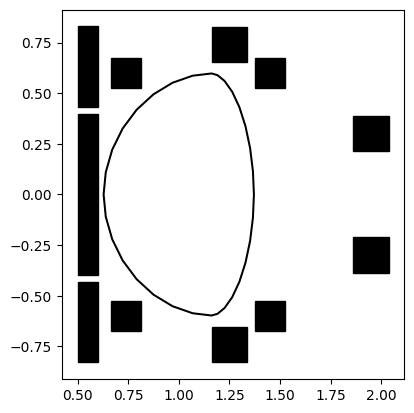

In [19]:
fig, ax = plt.subplots()
plt.fill(vv2[:,0], vv2[:,1], color = 'k')
plt.fill(lim2[:,0], lim2[:,1], color = 'white')

for key, coil in coils.items():
        plt.fill(corners(coil['rc'],coil['zc'],coil['w'],coil['h'])[:,0],corners(coil['rc'],coil['zc'],coil['w'],coil['h'])[:,1], color = 'k', linewidth = 1)

plt.gca().set_aspect(aspect = 1)

norm = plt.Normalize(np.min(-np.array(gammas))/4374.86737195676, np.max(-np.array(gammas))/4374.86737195676)
#norm = plt.Normalize(np.min(-np.array(gammas))/4374.86737195676,0.7)
cmap = mpl.cm.Blues_r(np.linspace(0,1,1000))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])
c = cmap(norm(np.array(gammas)/-4374.86737195676))

for i in range(13):
    plt.fill(plates[i,:,0], plates[i,:,1], facecolor = c[i], edgecolor = 'k', lw = .2)
    plt.fill(plates[25-i,:,0], plates[25-i,:,1], facecolor = c[i], edgecolor = 'k', lw = .2)

plt.xlim([0.5,1.5])
plt.ylim([-0.7, 0.7])

sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$\gamma / \gamma_{\mathrm{baseline}}$', size = 20)

plt.xlabel('R (m)', size = 20)
plt.ylabel('Z (m)', size = 20)
#cb.ax.set_yticks([0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
#cb.ax.set_yticklabels(['0.20', '0.25', '0.30', '0.35', '0.40', '0.45', r'$\geq$ 0.50' ])



e = 1.9
d = -0.5
r, z, zeff = boundaryShape(kapu = e, kapl = e, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1, zoffset = 0, upnull = True, lonull = True)
boundary = np.column_stack((r,z))

ind = 50
plate_inner = resize_polygon(boundary, 0.08)
plt.scatter(plate_inner[ind,0],plate_inner[ind,1] )

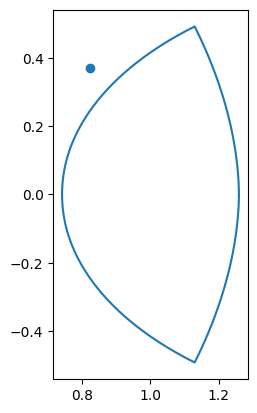

In [24]:
e = 1.9
d = -0.5
r, z, zeff = boundaryShape(kapu = e, kapl = e, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1, zoffset = 0, upnull = True, lonull = True)
boundary = np.column_stack((r,z))
plt.plot(boundary[:,0], boundary[:,1])
plt.gca().set_aspect(aspect = 1)
ind = 130
plate_inner = resize_polygon(boundary, 0.08)
plt.scatter(plate_inner[ind,0],plate_inner[ind,1] )

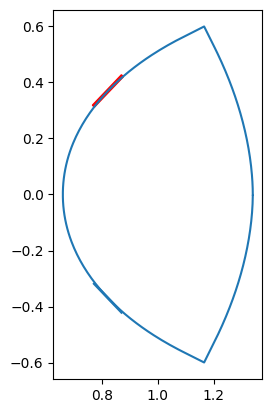

In [25]:
#inds = np.array([50])
inds = np.array([130])
length = 0.15
width = 0.01

derivs = []
for i, point in enumerate(plate_inner):
    if i==0:
        last = plate_inner[-1,:]
        next = plate_inner[i+1,:]
    elif i == np.size(plate_inner[:,0])-1:
        last = plate_inner[i-1,:]
        next = plate_inner[0,:]
    else: 
        next = plate_inner[i+1,:]
        last = plate_inner[i-1,:]
    
    derivs.append((next-last)/np.linalg.norm(next-last))

derivs = np.array(derivs)
orth = np.transpose([derivs[:,1], -derivs[:,0]])

for i in inds:
    center = plate_inner[i,:]
    p1 = center + length/2*derivs[i,:] + width/2*orth[i,:]
    p2 = center + length/2*derivs[i,:] - width/2*orth[i,:]
    p3 = center - length/2*derivs[i,:] - width/2*orth[i,:]
    p4 = center - length/2*derivs[i,:] + width/2*orth[i,:]

    plate_u = np.array([p1, p2, p3, p4])

plt.fill(plate_u[:,0], plate_u[:,1], color= 'r')
plt.plot(plate_inner[:,0], plate_inner[:,1])
plt.gca().set_aspect(aspect = 1)

plate_l = np.copy(plate_u)
plate_l[:,1] = -plate_l[:,1]
plt.fill(plate_l[:,0], plate_l[:,1])


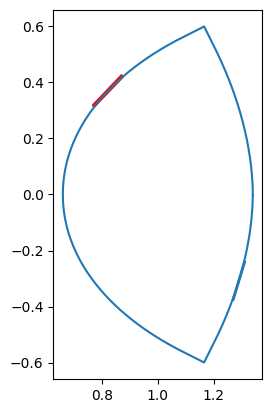

In [43]:
inds = np.array([50])

length = 0.15
width = 0.01

derivs = []
for i, point in enumerate(plate_inner):
    if i==0:
        last = plate_inner[-1,:]
        next = plate_inner[i+1,:]
    elif i == np.size(plate_inner[:,0])-1:
        last = plate_inner[i-1,:]
        next = plate_inner[0,:]
    else: 
        next = plate_inner[i+1,:]
        last = plate_inner[i-1,:]
    
    derivs.append((next-last)/np.linalg.norm(next-last))

derivs = np.array(derivs)
orth = np.transpose([derivs[:,1], -derivs[:,0]])

for i in inds:
    center = plate_inner[i,:]
    p1 = center + length/2*derivs[i,:] + width/2*orth[i,:]
    p2 = center + length/2*derivs[i,:] - width/2*orth[i,:]
    p3 = center - length/2*derivs[i,:] - width/2*orth[i,:]
    p4 = center - length/2*derivs[i,:] + width/2*orth[i,:]

    plate_u_lfs = np.array([p1, p2, p3, p4])

plt.fill(plate_u[:,0], plate_u[:,1], color= 'r')
plt.plot(plate_inner[:,0], plate_inner[:,1])
plt.gca().set_aspect(aspect = 1)

plate_l_lfs = np.copy(plate_u_lfs)
plate_l_lfs[:,1] = -plate_l_lfs[:,1]
plt.fill(plate_l_lfs[:,0], plate_l_lfs[:,1])


In [26]:
gs_mesh = gs_Domain()
# Define region information for mesh
gs_mesh.define_region('air',vac_resolution,'boundary')
gs_mesh.define_region('plasma',plasma_resolution,'plasma')
gs_mesh.define_region('vv',vv_resolution,'conductor',eta=1.33e-6)
gs_mesh.define_region('plate_upper',vv_resolution,'conductor',eta=3.8E-8)
gs_mesh.define_region('plate_lower',vv_resolution,'conductor',eta=3.8E-8)
# Define each of the coils
for key, coil in coils.items():
    gs_mesh.define_region(key,coil_resolution,'coil')

# Define vaccum vessel geometry
gs_mesh.add_annulus(lim2,'plasma',vv2,'vv',parent_name='air')
# Define the shape of the coils
for key, coil in coils.items():
    gs_mesh.add_rectangle(coil['rc'],coil['zc'],coil['w'],coil['h'],key,parent_name='air')

gs_mesh.add_polygon(plate_u, 'plate_upper')
gs_mesh.add_polygon(plate_l, 'plate_lower')

#Create mesh
mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
coil_dict = gs_mesh.get_coils()
cond_dict = gs_mesh.get_conductors()

Assembling regions:
  # of unique points    = 594
  # of unique segments  = 58
Generating mesh:
  # of points  = 4195
  # of cells   = 8272
  # of regions = 16


#----------------------------------------------
OpenFUSIONToolkit Initialized
Development branch:   main
Revision id:          11ca7a7
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.870E+00
    # of points  =    4195
    # of edges   =   12466
    # of cells   =    8272
    # of boundary points =     116
    # of boundary edges  =     116
    # of boundary cells  =     116
  Resolution statistics:
    hmin =  1.000E-02
    hrms =  3.916E-02
    hmax =  1.119

 "none"
Flux surfaces from 600x600 gEQDSK
Levels based on psi ...
Grid diagonal resolution: 0.0025365011216131003 [m]
Cropping tables ...
Find magnetic axis ...
Find separatrix ...
Tracing flux surfaces ...
  > Took 0:00:01.750225
Find Br, Bz, F on flux surfaces ...
  > Took 0:00:00.992077
Flux surface averaging ...
  > Took 0:00:01.253429
Geometric quantities ...
  > Took 0:00:02.871012
[1.07706152 0.38719515]
[ 1.07709486 -0.38717474]
hi
#----------------------------------------------
OpenFUSIONToolkit Initialized
Development branch:   main
Revision id:          11ca7a7
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#-

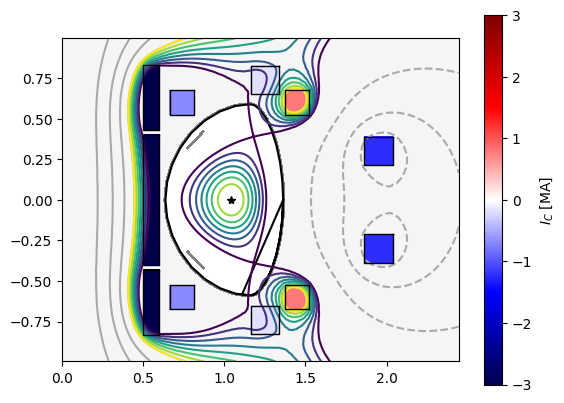

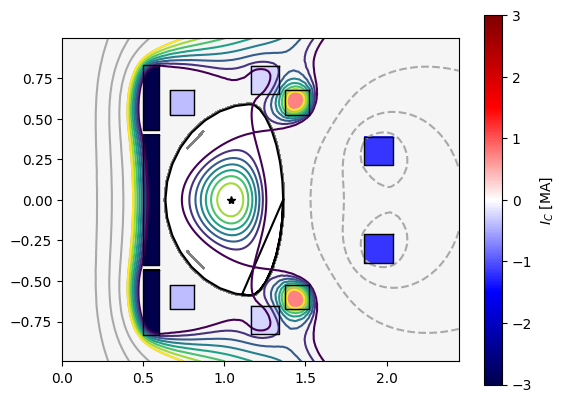

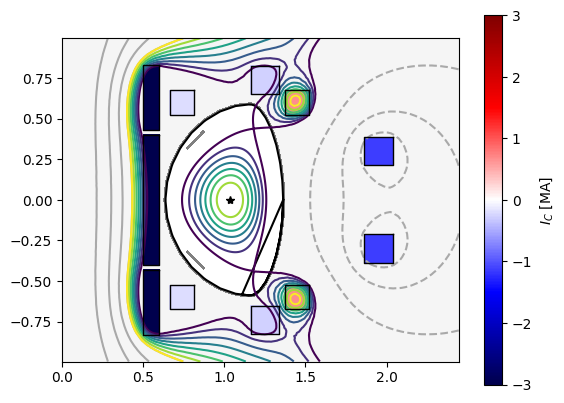

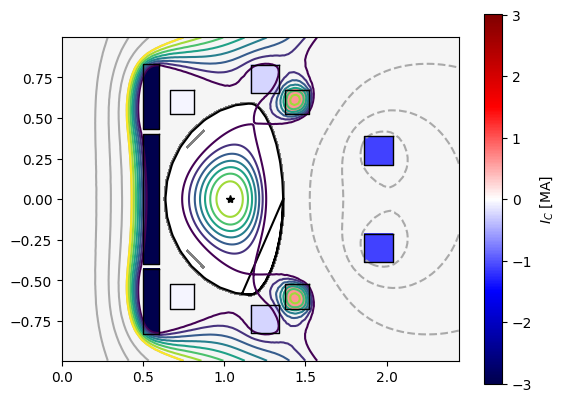

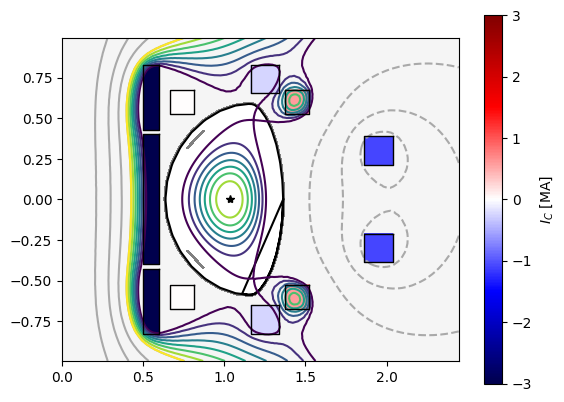

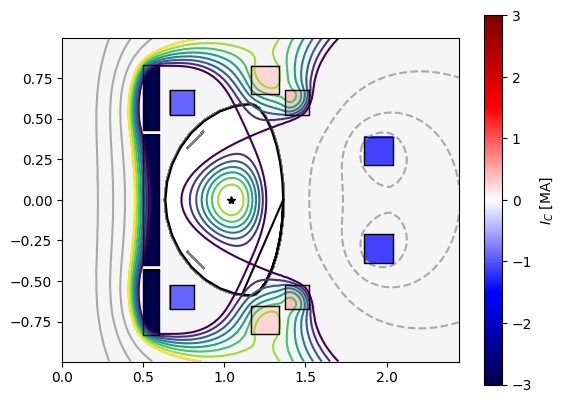

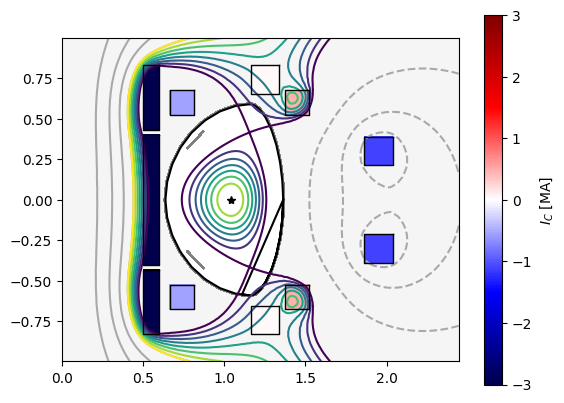

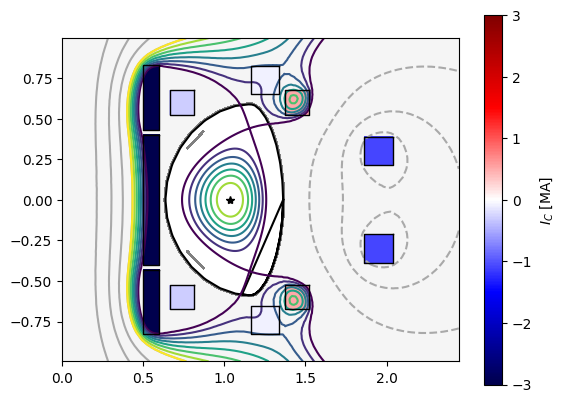

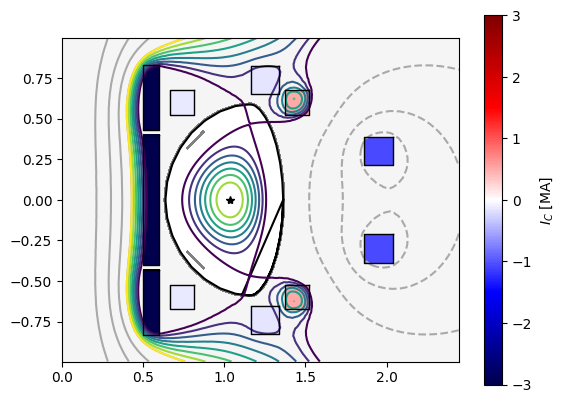

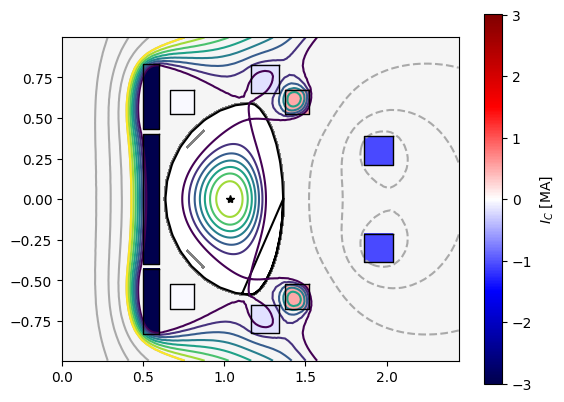

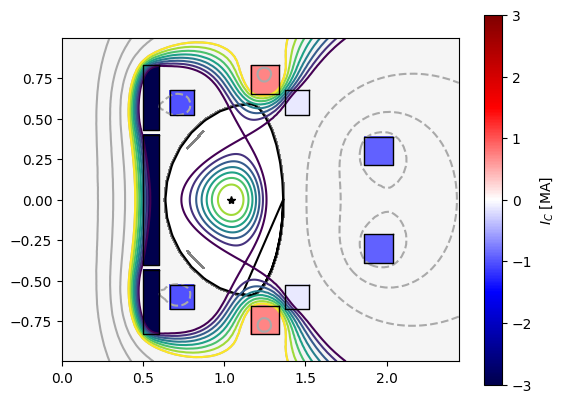

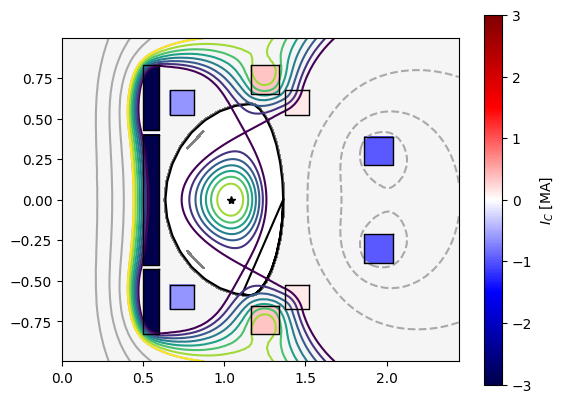

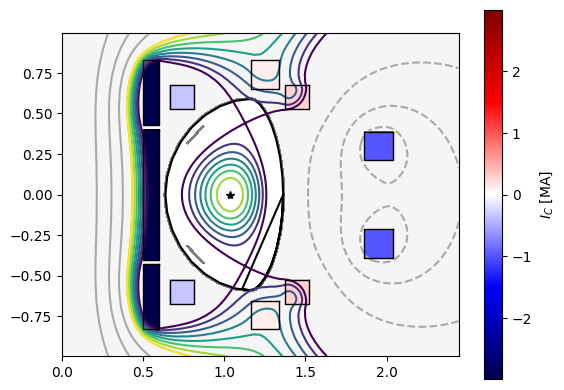

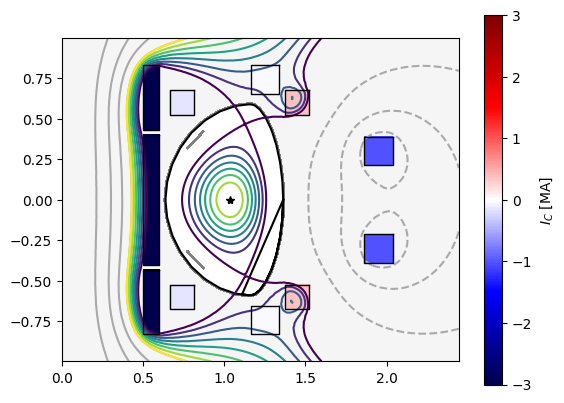

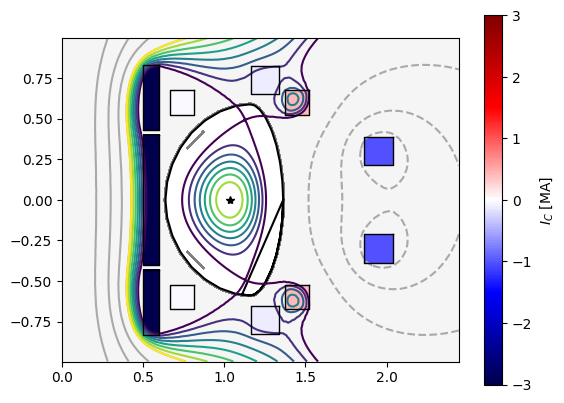

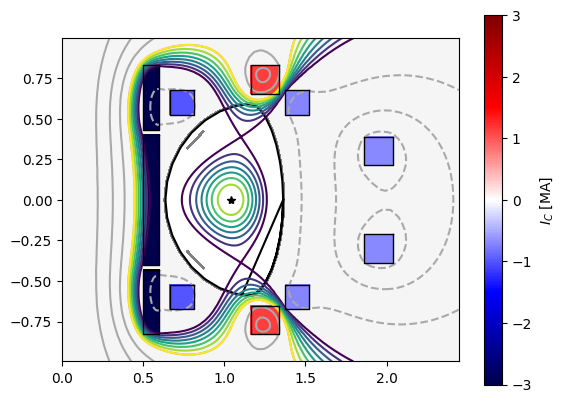

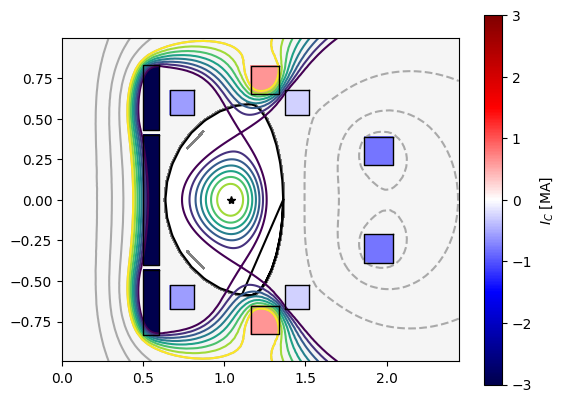

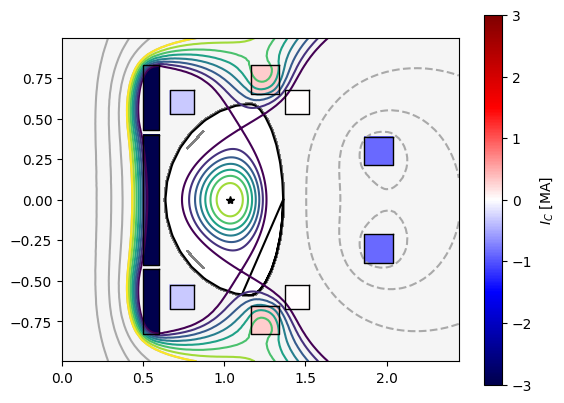

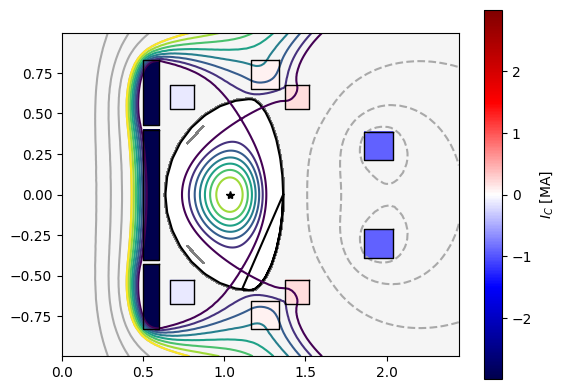

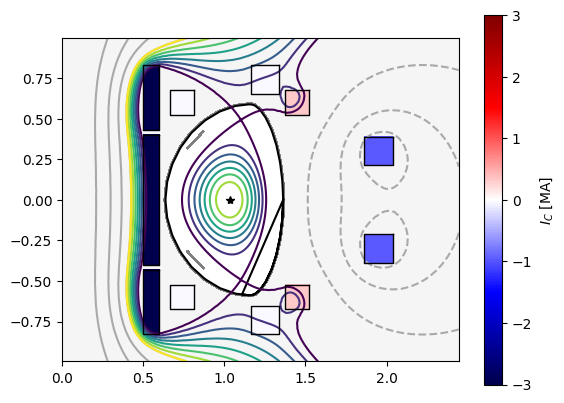

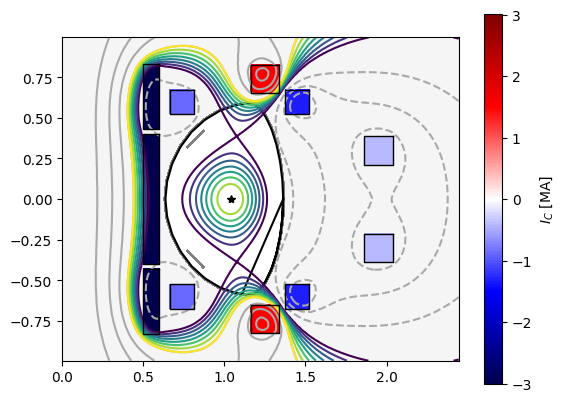

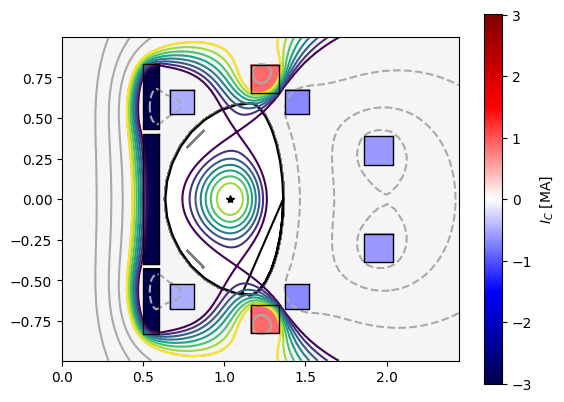

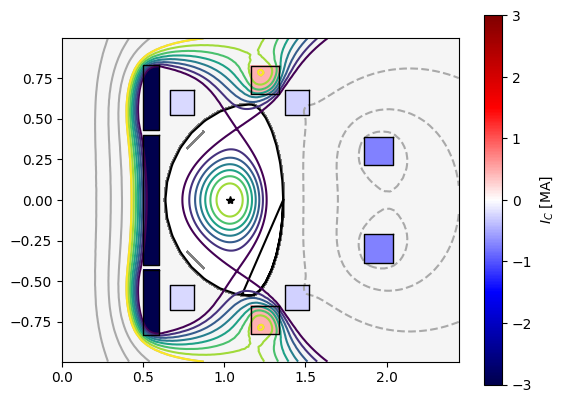

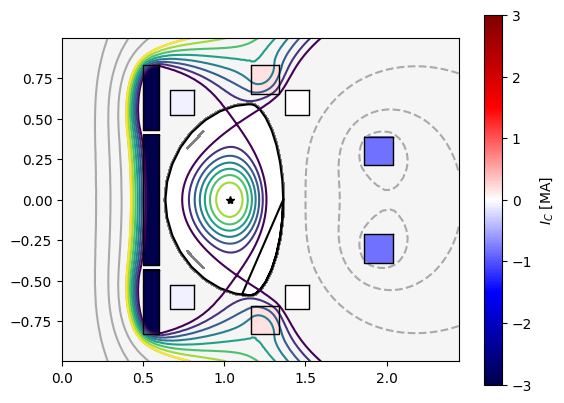

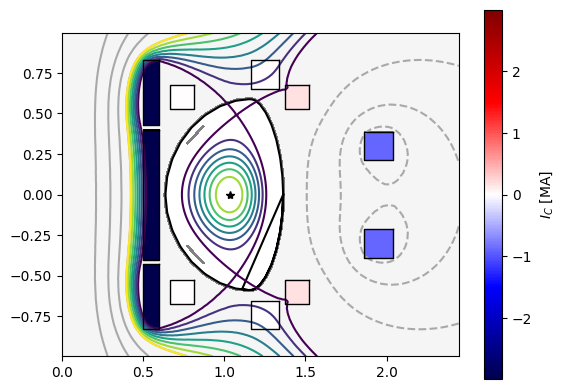

In [27]:
import copy
from omfit_classes.omfit_eqdsk import OMFITgeqdsk
d_omfit = []
e_omfit = []
d_tok = []
e_tok = []
q95 = []
betap = []
li = []
coil_currents = []
ds = np.linspace(-0.7, -.3, 5)
es = np.linspace(1.5, 1.9, 5)
dist = []
gammas = []
taus = []
eqdsks = []
lcfs = []

for d in ds: 
    for e in es:
        mygs.reset()
        mygs = TokaMaker()
        mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
        mygs.setup_regions(cond_dict=cond_dict)
        mygs.setup(order = 2, F0 =1*3) ## F0 = B0 * R0

        coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
        targets = np.zeros(mygs.ncoils+1)
        coil_weights = 0.5*np.ones(mygs.ncoils+1)

        #Set target values for CS coils
        coil_reg_mat[0,0] = 1
        coil_reg_mat[1,1] = 1
        coil_reg_mat[2,2] = 1
        targets[0] = -3E6
        targets[1] = -3E6
        targets[2] = -3E6

        #Enforce up/down symmetry in PF coils
        coil_reg_mat[3,3] = 1
        coil_reg_mat[3,7] = -1
        coil_reg_mat[4,4] = 1
        coil_reg_mat[4,8] = -1
        coil_reg_mat[5,5] = 1
        coil_reg_mat[5,9] = -1
        coil_reg_mat[6,6] = 1
        coil_reg_mat[6,10] = -1
        mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

        #Set upper bound on coil currents
        coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
        coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11
        mygs.set_coil_bounds(coil_bounds)

        # Define shape of P' anf FF' profiles
        n_sample = 40
        psi_sample = np.linspace(0.0,1.0,n_sample)
        # Set F*F' profile
        alpha = 2
        gamma = 3
        ffp_prof = {
            'type': 'linterp',
            'x': psi_sample,
            'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
        }
        ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
        # Set P' profile
        alpha = 2
        gamma = 3
        pp_prof = {
            'type': 'linterp',
            'x': psi_sample,
            'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
        }
        pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

        mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

        # set global targets
        Ip_target = 1E6
        mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)

        # set boundary/saddle point targets
        r, z, zeff = boundaryShape(kapu = e, kapl = e, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1, zoffset = 0, upnull = True, lonull = True, npts = 8)
        boundary = np.column_stack((r,z))
        boundary = np.nan_to_num(boundary)
        x_points = np.zeros((2,2))
        x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
        x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
        x_weights = 5*np.ones(2)
        mygs.set_saddles(x_points, x_weights)
        isoflux_weights = 10*np.ones(32)

      
        
        mygs.set_isoflux(boundary, isoflux_weights)

        #find equilibrium
        mygs.init_psi(0.68,0,0.2, 1.8,0.3)
        mygs.settings.maxits = 100
        mygs.update_settings()
        mygs.solve()

        #plot equilibrium
        fig, ax = plt.subplots(1,1)
        mygs.plot_machine(fig,ax,coil_colormap='seismic',coil_symmap=True,coil_scale=1.E-6,coil_clabel=r'$I_C$ [MA]')
        mygs.plot_psi(fig,ax,xpoint_color=None,vacuum_nlevels=4)
        
        for key, coil in coils.items():
            plt.plot(corners(coil['rc'],coil['zc'],coil['w'],coil['h'])[:,0],corners(coil['rc'],coil['zc'],coil['w'],coil['h'])[:,1], color = 'k', linewidth = 1)

        #save as eqdsk
        mygs.save_eqdsk('temp', lcfs_pad = .001, nr = 600, nz = 600)

        eqdsk = OMFITgeqdsk('temp')
        d_omfit.append(eqdsk['fluxSurfaces']['geo']['delta'][-1])    
        e_omfit.append(eqdsk['fluxSurfaces']['geo']['kap'][-1])
        
        

        lcfs.append(read_eqdsk('temp')['rzout'])
        stats = mygs.get_stats()
        q95.append(stats['q_95'])
        betap.append(stats['beta_pol'])
        li.append(stats['l_i'])
        d_tok.append(stats['delta'])
        e_tok.append(stats['kappa'])

        eig_vals, eig_vecs = mygs.eig_td(-1.E5,10, include_bounds = True)
        gammas.append(eig_vals[0,0])

        eig_wall, eigvec_wall = mygs.eig_wall()
        taus.append(1/eig_wall[1][0])

        #extract coil currents
        current,currentmap = mygs.get_coil_currents()
        coil_currents.append(current)
        

In [28]:
gw_hfs_plate = -np.array(gammas)
print(repr(gw_hfs_plate))

array([ 436.44789436,  659.632809  ,  962.90922444, 1335.942378  ,
       1713.36774958,  351.40420377,  545.94995327,  798.07549429,
       1084.66990981, 1416.21951663,  272.0191335 ,  433.58528327,
        651.24038969,  926.47706907, 1234.17600946,  212.98952596,
        354.99070062,  548.91077071,  788.22927283, 1058.35875861,
        160.00378271,  290.74348131,  460.43070233,  671.21137675,
        896.79807002])


In [29]:
gw_lfs = np.array([ 282.15127934,  488.57052893,  791.35505325, 1192.85614596,
       1673.67450727,  223.06448622,  401.70394702,  658.7362611 ,
        984.21659646, 1403.71898429,  187.78751002,  339.48169797,
        562.53179389,  865.15867071, 1225.95299851,  165.20125708,
        312.39150617,  510.64791428,  787.09210843, 1112.59894056,
        149.08375945,  288.59869073,  503.38737327,  752.21815357,
       1041.41283587])

tau =0.002101644122756776

gw_hfs = np.array([ 436.44789436,  659.632809  ,  962.90922444, 1335.942378  ,
       1713.36774958,  351.40420377,  545.94995327,  798.07549429,
       1084.66990981, 1416.21951663,  272.0191335 ,  433.58528327,
        651.24038969,  926.47706907, 1234.17600946,  212.98952596,
        354.99070062,  548.91077071,  788.22927283, 1058.35875861,
        160.00378271,  290.74348131,  460.43070233,  671.21137675,
        896.79807002])

In [35]:
print(gw_hfs*tau)

[0.91725815 1.38631342 2.02369251 2.80767545 3.60088926 0.73852658
 1.14739251 1.67727067 2.27959014 2.97638942 0.57168741 0.91124196
 1.36867554 1.94712509 2.59379876 0.44762819 0.74606412 1.1536151
 1.65657742 2.22429346 0.33627101 0.61103933 0.96766148 1.41064745
 1.88475039]


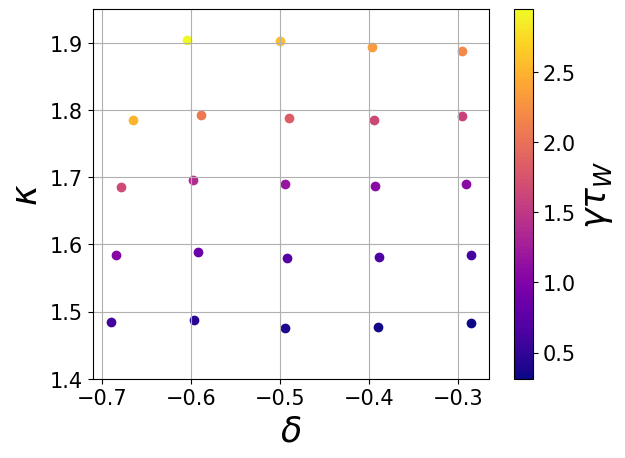

In [34]:

norm = plt.Normalize(np.min(gw_lfs*tau), 2.95011775)
cmap = mpl.cm.plasma(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])
c = cmap(norm(tau*(gw_lfs)))

for i in range(25):
    if i is not 4:
        plt.scatter(d_omfit[i], e_omfit[i], color = c[i])
plt.xlabel(r'$\delta$', size = 25)
plt.ylabel(r'$\kappa$', size = 25)
#plt.xlim([-0.7, -0.2])
plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$\gamma \tau_{W}$', size = 25)
cb.ax.tick_params(labelsize=15)

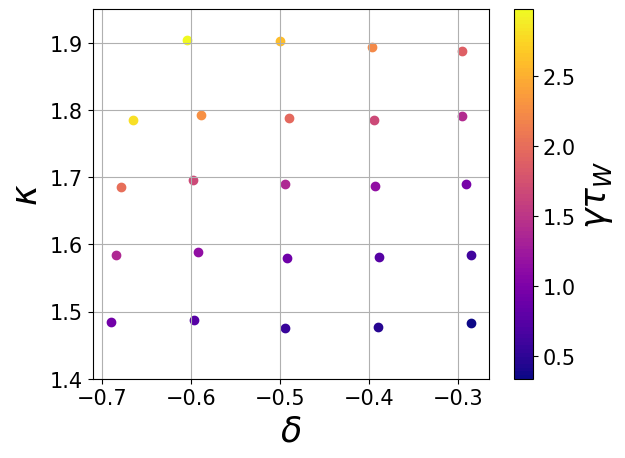

In [36]:

norm = plt.Normalize(np.min(gw_hfs*tau), 2.97638942)
cmap = mpl.cm.plasma(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])
c = cmap(norm(tau*(gw_hfs)))

for i in range(25):
    if i is not 4:
        plt.scatter(d_omfit[i], e_omfit[i], color = c[i])
plt.xlabel(r'$\delta$', size = 25)
plt.ylabel(r'$\kappa$', size = 25)
#plt.xlim([-0.7, -0.2])
plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$\gamma \tau_{W}$', size = 25)
cb.ax.tick_params(labelsize=15)

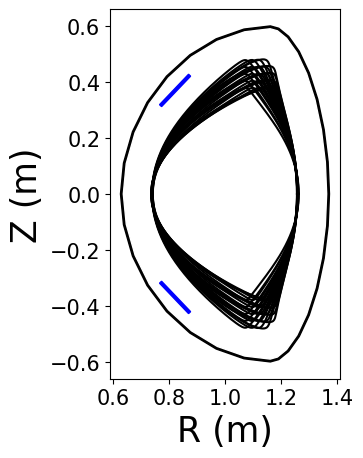

In [50]:
fig, ax = plt.subplots()
plt.fill(vv2[:,0], vv2[:,1], color = 'k')
plt.fill(lim2[:,0], lim2[:,1], color = 'w')
for i in range(25):
    if i is not 4:
        plt.plot(lcfs[i][:,0], lcfs[i][:,1], color = 'k')

plt.gca().set_aspect(aspect = 1)

plt.xlabel(r'R (m)', size = 25)
plt.ylabel(r'Z (m)', size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.fill(plate_u[:,0], plate_u[:,1], color= 'b')
plt.fill(plate_l[:,0], plate_l[:,1], color = 'b')

#plt.fill(plate_u_lfs[:,0], plate_u_lfs[:,1], color= 'b')
#plt.fill(plate_l_lfs[:,0], plate_l_lfs[:,1], color = 'b')

